In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix, accuracy_score
import statsmodels.formula.api as SM
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
os.chdir("C:\\Users\\brashmir\\Desktop\\Consumer cards - data analysis")
data = pd.read_excel("Analysis tools.xlsx")
data.head()

AGE Age_Band  App Type     App Number APPNPARMSAPPNTYPE  \
0   20    18-25       420  2032883289503               STD   
1   29    25-30       210  2032913297845               STD   
2   52    45-55       210  2020287290073               STD   
3   55    55-65       130  2032823270310               STD   
4   57    55-65       600  2020290430042               CLI   

  APPNSCORESTRATEGYDECISION ApptIncomeVerifiedFlag BT_flag   Channel  \
0                         D                      N       N  Internet   
1                         D                      N       N  Internet   
2                         A                      N       N    Branch   
3                         A                      N       N  Internet   
4                         A                      N       N  Internet   

         customer_type     ...     reasoncode_2_fs  State total_gross_income  \
0                  NTB     ...                DA02    QLD                0.0   
1                  NTB     ...                RA03    NSW                0.0   
2  Existing-NonLending     ...                DA02    VIC                0.0   
3     Existing-Lending     ...                RA01    QLD                0.0   
4     Existing-Lending     ...                RL08    VIC                0.0   

  Triex_used     UMI Interest Rate - PA Application Date  \
0          N -1129.0             0.2024       2020-10-14   
1          N -1994.0             0.2024       2020-10-17   
2          N -1529.0             0.2024       2020-10-13   
3          N -7403.0             0.2024       2020-10-08   
4          N -2056.0                NaN       2020-10-16   

           App Final date Time to decision  Activation  
0 2020-10-14 17:52:34.207                1         NaN  
1 2020-10-17 10:15:58.397                0         NaN  
2 2020-10-13 15:02:44.590                1         NaN  
3 2020-10-08 08:55:01.250                1         NaN  
4 2020-10-16 16:54:37.030                1         NaN  

[5 rows x 41 columns]

In [3]:
data.shape

(30851, 41)

In [4]:
data.dtypes

AGE                                   int64
Age_Band                             object
App Type                              int64
App Number                            int64
APPNPARMSAPPNTYPE                    object
APPNSCORESTRATEGYDECISION            object
ApptIncomeVerifiedFlag               object
BT_flag                              object
Channel                              object
customer_type                        object
Description                          object
drawn                               float64
EMPLOYCURRSTATUS                     object
Final_Decision                       object
hem                                 float64
HEM_Used                             object
income_band                          object
INCOMEVERIFIEDFLAG                   object
Industry                             object
LIMITALLOCATED                      float64
LIMITLOANREQUESTED                  float64
NEGUMI                                int64
OCCUPATIONCODE                  

In [5]:
data.describe()

AGE      App Type    App Number         drawn           hem  \
count  30851.000000  30851.000000  3.085100e+04  30851.000000  30851.000000   
mean      36.903212    367.572040  2.029987e+12   2915.228745   2061.485430   
std       12.399471    151.993227  5.461000e+09   6111.908303    828.196946   
min       18.000000    115.000000  2.020271e+12      0.000000      0.000000   
25%       28.000000    260.000000  2.032753e+12      0.000000   1480.000000   
50%       34.000000    420.000000  2.032973e+12      0.000000   1883.000000   
75%       44.000000    505.000000  2.033163e+12   1000.000000   2505.000000   
max      111.000000    842.000000  2.033353e+12  75000.000000   7165.000000   

       LIMITALLOCATED  LIMITLOANREQUESTED        NEGUMI  OCCUPATIONCODE  \
count    30851.000000        3.085100e+04  30851.000000    30851.000000   
mean      7207.562964        1.537276e+04      0.218923       45.427247   
std       7441.178187        1.845346e+04      0.413523       28.984934   
min          0.000000        0.000000e+00      0.000000        1.000000   
25%       1000.000000        5.000000e+03      0.000000       18.000000   
50%       6000.000000        1.000000e+04      0.000000       41.000000   
75%      14000.000000        1.600000e+04      0.000000       79.000000   
max      85000.000000        1.050000e+06      1.000000       86.000000   

       total_gross_income           UMI  Interest Rate - PA  Time to decision  \
count        3.085100e+04  3.085100e+04        26623.000000      30851.000000   
mean         1.200896e+05  2.247610e+03            0.178241         13.161453   
std          1.099082e+06  5.201336e+04            0.035898         28.960465   
min          0.000000e+00 -9.307495e+05            0.124900          0.000000   
25%          4.680000e+04  8.105000e+00            0.124900          1.000000   
50%          6.999600e+04  6.375100e+02            0.202400          2.000000   
75%          1.039920e+05  1.563845e+03            0.202400          7.000000   
max          1.197666e+08  5.280293e+06            0.202400        147.000000   

        Activation  
count  8143.000000  
mean      0.974334  
std       0.158147  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

## Imputing Null values

In [6]:
data.isnull().sum()

AGE                              0
Age_Band                         0
App Type                         0
App Number                       0
APPNPARMSAPPNTYPE                0
APPNSCORESTRATEGYDECISION        0
ApptIncomeVerifiedFlag           0
BT_flag                          0
Channel                          0
customer_type                    0
Description                      0
drawn                            0
EMPLOYCURRSTATUS                 0
Final_Decision                   0
hem                              0
HEM_Used                         0
income_band                      0
INCOMEVERIFIEDFLAG           16878
Industry                         0
LIMITALLOCATED                   0
LIMITLOANREQUESTED               0
NEGUMI                           0
OCCUPATIONCODE                   0
PERMANENTRESIDENT                0
Policy_Decision_fs               0
Policy_Decision_ls               0
Product                          0
product_group                    0
reason              

In [7]:
df= data.drop(['INCOMEVERIFIEDFLAG','Age_Band','Activation'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30851 entries, 0 to 30850
Data columns (total 38 columns):
AGE                          30851 non-null int64
App Type                     30851 non-null int64
App Number                   30851 non-null int64
APPNPARMSAPPNTYPE            30851 non-null object
APPNSCORESTRATEGYDECISION    30851 non-null object
ApptIncomeVerifiedFlag       30851 non-null object
BT_flag                      30851 non-null object
Channel                      30851 non-null object
customer_type                30851 non-null object
Description                  30851 non-null object
drawn                        30851 non-null float64
EMPLOYCURRSTATUS             30851 non-null object
Final_Decision               30851 non-null object
hem                          30851 non-null float64
HEM_Used                     30851 non-null object
income_band                  30851 non-null object
Industry                     30851 non-null object
LIMITALLOCATED           

In [9]:
df = df.fillna(0)

In [10]:
check=(df == 0).sum()
check

AGE                              0
App Type                         0
App Number                       0
APPNPARMSAPPNTYPE                0
APPNSCORESTRATEGYDECISION        0
ApptIncomeVerifiedFlag           0
BT_flag                          0
Channel                          0
customer_type                    0
Description                      0
drawn                        23056
EMPLOYCURRSTATUS                 0
Final_Decision                   0
hem                              1
HEM_Used                         0
income_band                      0
Industry                         0
LIMITALLOCATED                5748
LIMITLOANREQUESTED             813
NEGUMI                       24097
OCCUPATIONCODE                   0
PERMANENTRESIDENT                0
Policy_Decision_fs               0
Policy_Decision_ls               0
Product                          0
product_group                    0
reason                           0
reasoncode_1_fs                  0
REASONCODE_1last    

In [11]:
df.isnull().sum()

AGE                          0
App Type                     0
App Number                   0
APPNPARMSAPPNTYPE            0
APPNSCORESTRATEGYDECISION    0
ApptIncomeVerifiedFlag       0
BT_flag                      0
Channel                      0
customer_type                0
Description                  0
drawn                        0
EMPLOYCURRSTATUS             0
Final_Decision               0
hem                          0
HEM_Used                     0
income_band                  0
Industry                     0
LIMITALLOCATED               0
LIMITLOANREQUESTED           0
NEGUMI                       0
OCCUPATIONCODE               0
PERMANENTRESIDENT            0
Policy_Decision_fs           0
Policy_Decision_ls           0
Product                      0
product_group                0
reason                       0
reasoncode_1_fs              0
REASONCODE_1last             0
reasoncode_2_fs              0
State                        0
total_gross_income           0
Triex_us

In [12]:
df.nunique()

AGE                             81
App Type                        26
App Number                   30851
APPNPARMSAPPNTYPE                4
APPNSCORESTRATEGYDECISION        4
ApptIncomeVerifiedFlag           3
BT_flag                          2
Channel                          4
customer_type                    3
Description                     59
drawn                           93
EMPLOYCURRSTATUS                 8
Final_Decision                   5
hem                             83
HEM_Used                         2
income_band                      9
Industry                        12
LIMITALLOCATED                 141
LIMITLOANREQUESTED             189
NEGUMI                           2
OCCUPATIONCODE                  86
PERMANENTRESIDENT                3
Policy_Decision_fs               3
Policy_Decision_ls               3
Product                         11
product_group                    5
reason                          15
reasoncode_1_fs                 60
REASONCODE_1last    

In [13]:
dups=df.duplicated()
print('Number of duplicate rows = %d' %(dups.sum()))
df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AGE, App Type, App Number, APPNPARMSAPPNTYPE, APPNSCORESTRATEGYDECISION, ApptIncomeVerifiedFlag, BT_flag, Channel, customer_type, Description, drawn, EMPLOYCURRSTATUS, Final_Decision, hem, HEM_Used, income_band, Industry, LIMITALLOCATED, LIMITLOANREQUESTED, NEGUMI, OCCUPATIONCODE, PERMANENTRESIDENT, Policy_Decision_fs, Policy_Decision_ls, Product, product_group, reason, reasoncode_1_fs, REASONCODE_1last, reasoncode_2_fs, State, total_gross_income, Triex_used, UMI, Interest Rate - PA, Application Date, App Final date, Time to decision]
Index: []

[0 rows x 38 columns]

## Exploratory data Analysis

In [14]:
df['Final_Decision'].value_counts(normalize = True)

Decline      0.516256
Approve      0.309877
Cancelled    0.115523
Pending      0.057697
Expired      0.000648
Name: Final_Decision, dtype: float64

In [15]:
df["Final_Decision"].value_counts().sort_index().plot.bar()
df.Final_Decision.value_counts()

Decline      15927
Approve       9560
Cancelled     3564
Pending       1780
Expired         20
Name: Final_Decision, dtype: int64

In [16]:
sns.distplot(df['AGE'])

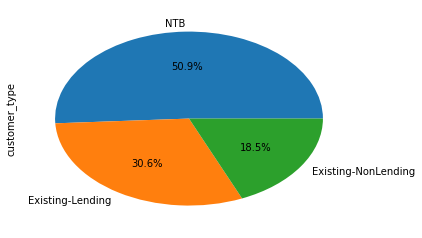

In [17]:
pd.value_counts(df['customer_type']).plot(kind = "pie", autopct='%1.1f%%')
plt.show()

In [18]:
plt.figure(figsize=(20,20))
ax = sns.barplot(x= 'total_gross_income', y=  'Product' ,hue= df['Final_Decision'] , data=df)

Final_Decision  Channel   
Approve         Branch         1154
                Internet       7798
                Paper Form      116
                Phone           492
Cancelled       Branch          321
                Internet       3085
                Paper Form        7
                Phone           151
Decline         Branch          844
                Internet      14561
                Paper Form       13
                Phone           509
Expired         Branch            4
                Internet         14
                Phone             2
Pending         Branch          185
                Internet       1517
                Paper Form        2
                Phone            76
dtype: int64


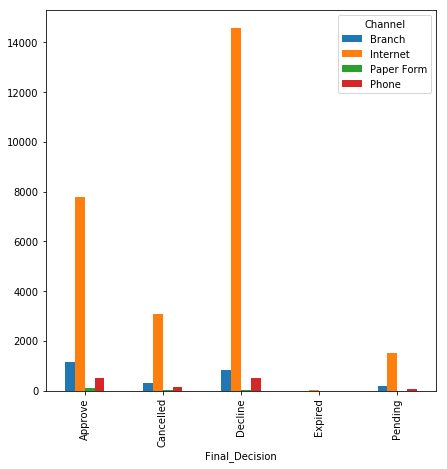

In [19]:
Ch = df.groupby(['Final_Decision','Channel'])
print(Ch.size())

fig,ax = plt.subplots(figsize=(7,7))

df.groupby(['Final_Decision','Channel']).count()['total_gross_income'].unstack().plot(ax=ax, kind='bar' )

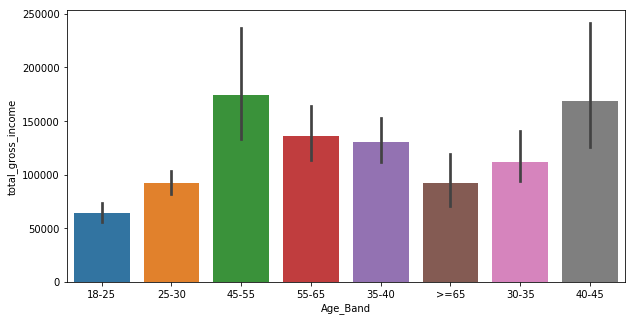

In [20]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Age_Band' , y='total_gross_income' , data=data)

In [21]:
plt.figure(figsize=(12,10))
sns.countplot(y=(df['Industry']),hue= df['PERMANENTRESIDENT'], palette='PuRd_r');

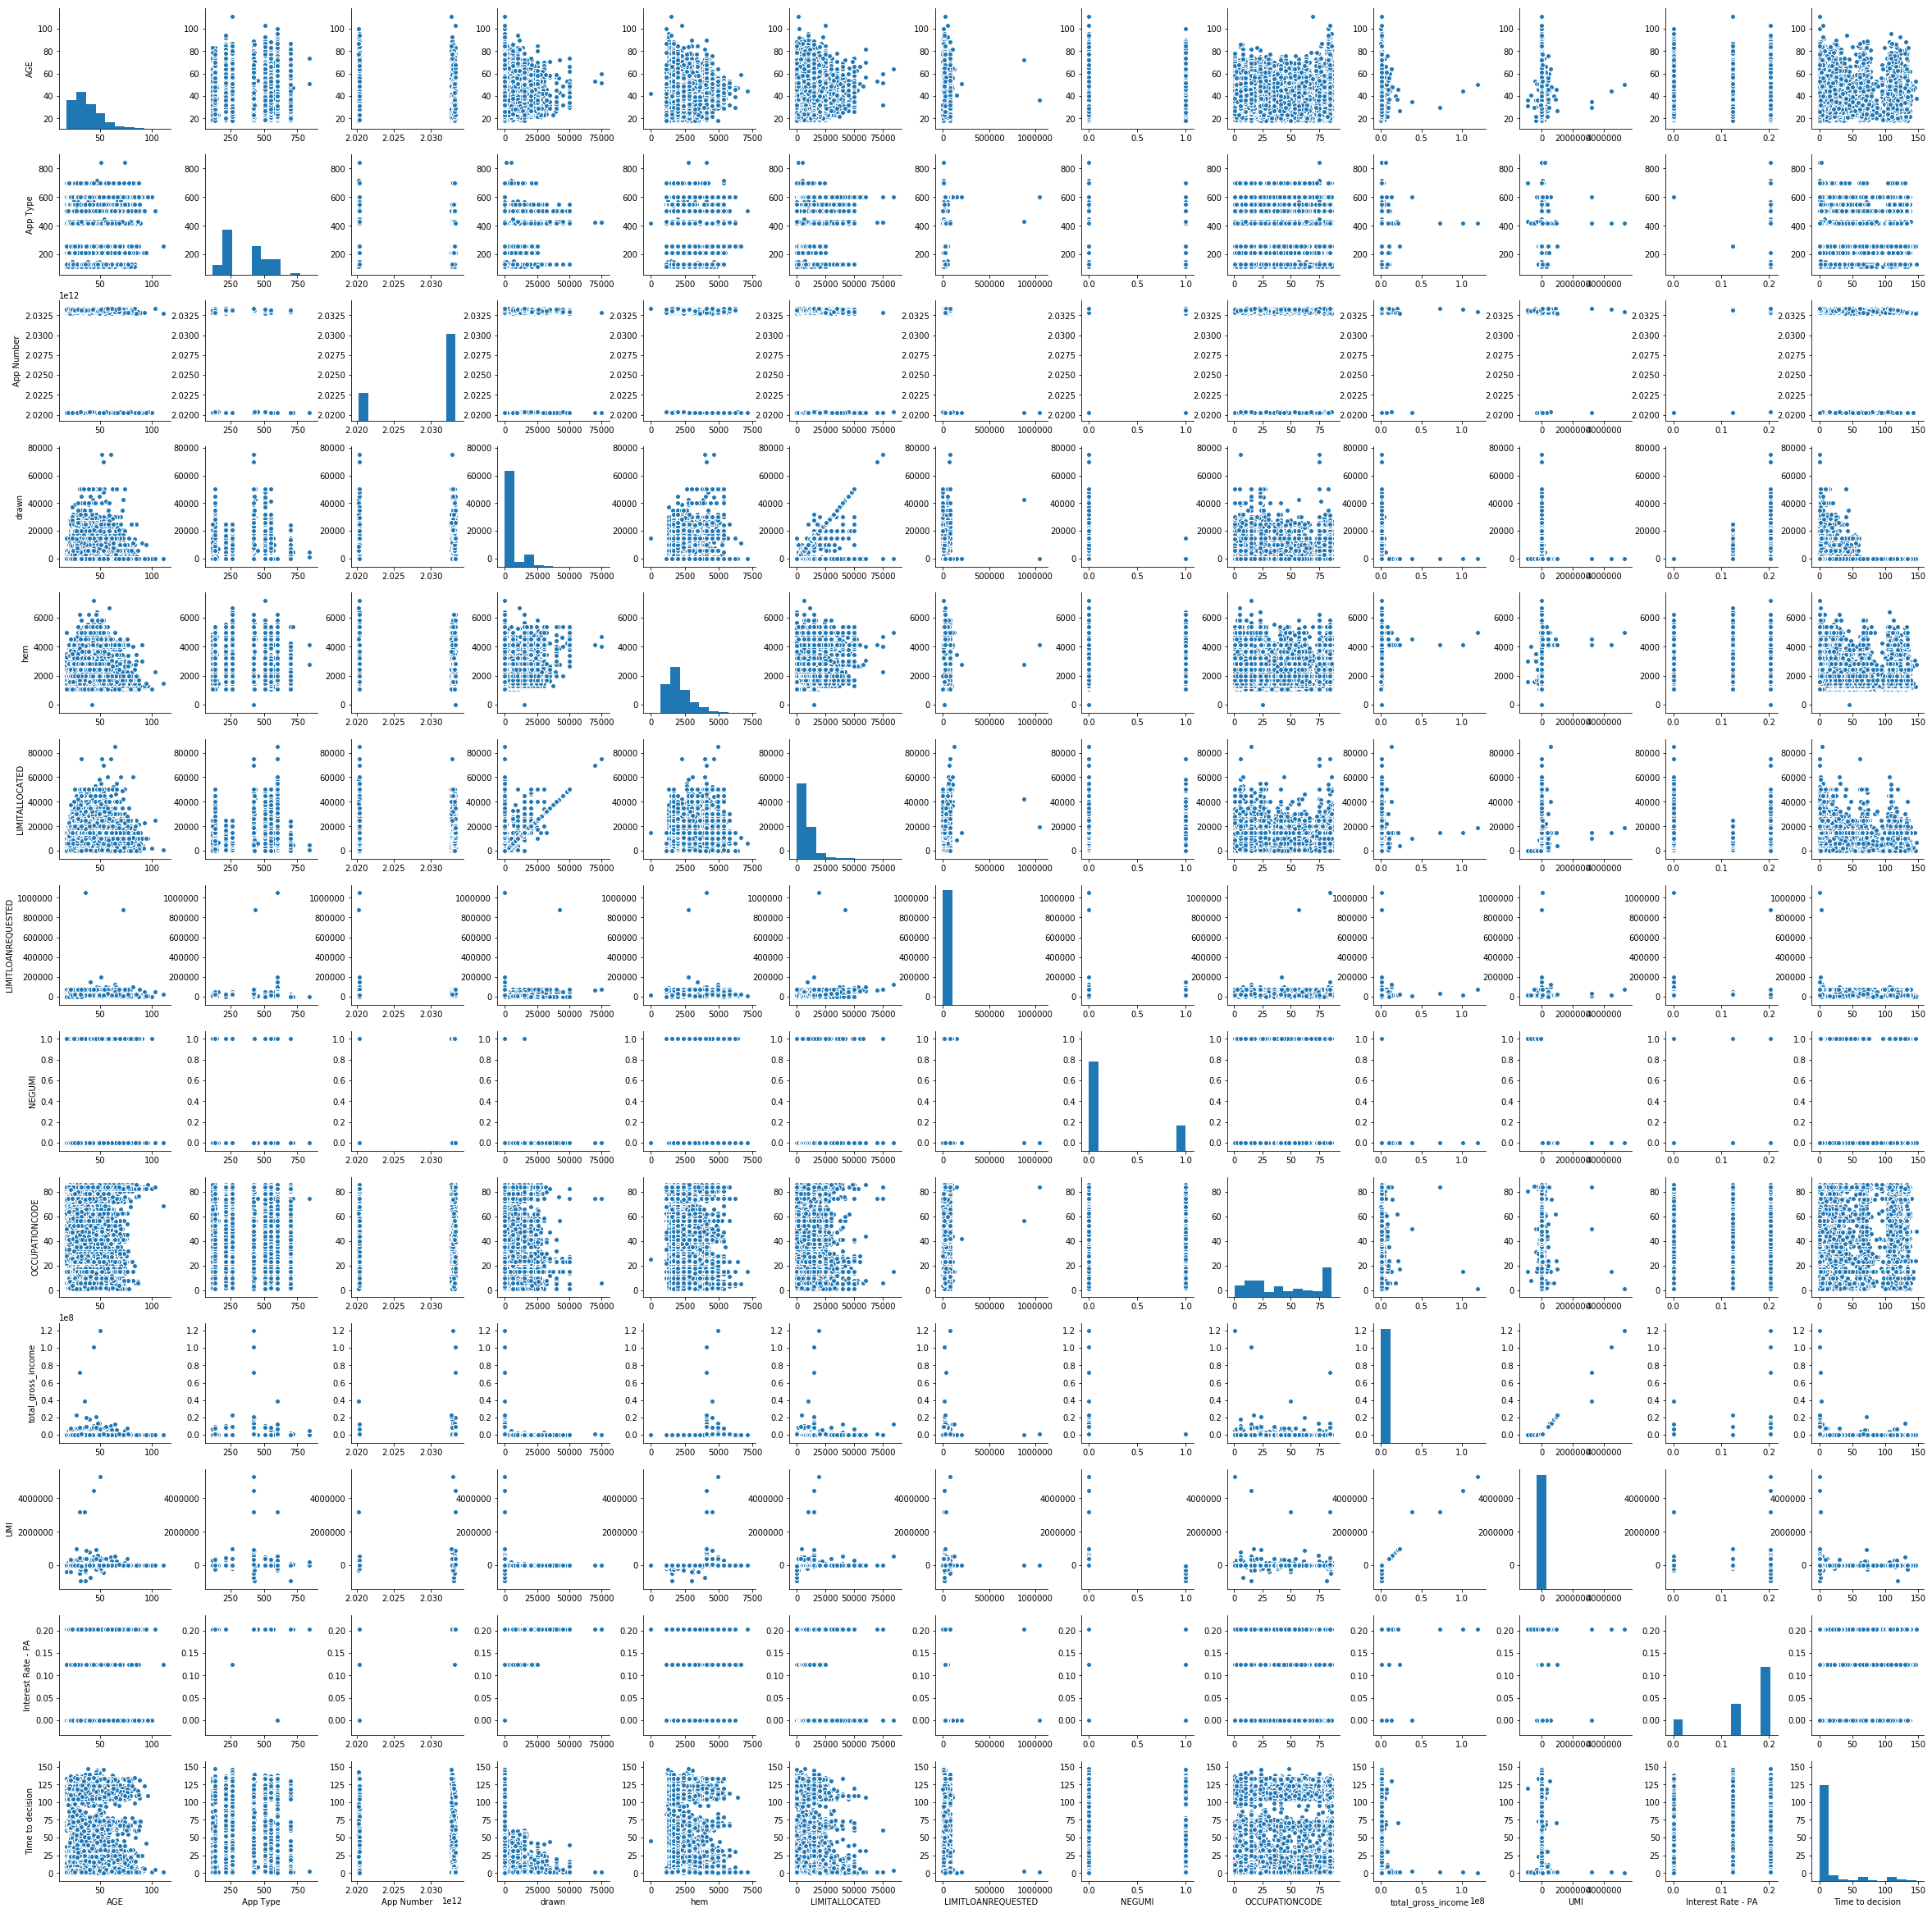

In [22]:
sns.pairplot(df)
plt.show()

g = sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
g.fig.set_size_inches(15,15)

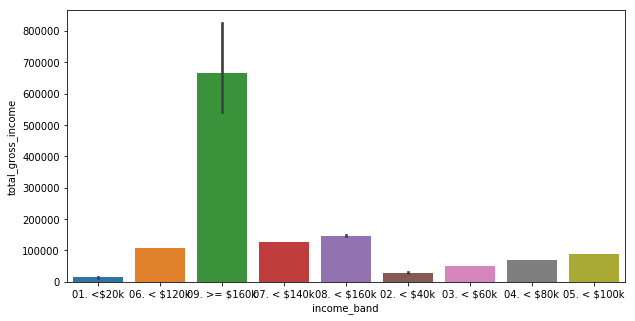

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='income_band' , y='total_gross_income' , data=df);
ax

In [24]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.hem, df.UMI)
print('pearson correlation: %.3f' % corr)

pearson correlation: 0.098


In [25]:
df.corr()

AGE  App Type  App Number     drawn       hem  \
AGE                 1.000000  0.124980   -0.224215  0.033795  0.209623   
App Type            0.124980  1.000000   -0.399605  0.022442  0.144426   
App Number         -0.224215 -0.399605    1.000000  0.079510 -0.056558   
drawn               0.033795  0.022442    0.079510  1.000000  0.216665   
hem                 0.209623  0.144426   -0.056558  0.216665  1.000000   
LIMITALLOCATED      0.104901  0.300290   -0.113051  0.555821  0.323473   
LIMITLOANREQUESTED  0.002211  0.145426    0.172540  0.133766  0.136715   
NEGUMI              0.104675 -0.005075   -0.024166 -0.252331 -0.004301   
OCCUPATIONCODE     -0.023599 -0.142090    0.096351 -0.262736 -0.318119   
total_gross_income  0.021866  0.016571    0.002789  0.000841  0.137976   
UMI                 0.009796  0.006948    0.003344 -0.007096  0.097582   
Interest Rate - PA -0.177294 -0.396425    0.617874  0.237887 -0.027376   
Time to decision    0.050059  0.050970   -0.081752 -0.115016  0.043620   

                    LIMITALLOCATED  LIMITLOANREQUESTED    NEGUMI  \
AGE                       0.104901            0.002211  0.104675   
App Type                  0.300290            0.145426 -0.005075   
App Number               -0.113051            0.172540 -0.024166   
drawn                     0.555821            0.133766 -0.252331   
hem                       0.323473            0.136715 -0.004301   
LIMITALLOCATED            1.000000            0.351663 -0.419213   
LIMITLOANREQUESTED        0.351663            1.000000 -0.018493   
NEGUMI                   -0.419213           -0.018493  1.000000   
OCCUPATIONCODE           -0.274094           -0.044781  0.089644   
total_gross_income        0.050596            0.031807 -0.026452   
UMI                       0.040712            0.018360 -0.045865   
Interest Rate - PA       -0.007666            0.142111 -0.073869   
Time to decision          0.096950           -0.008143 -0.117266   

                    OCCUPATIONCODE  total_gross_income       UMI  \
AGE                      -0.023599            0.021866  0.009796   
App Type                 -0.142090            0.016571  0.006948   
App Number                0.096351            0.002789  0.003344   
drawn                    -0.262736            0.000841 -0.007096   
hem                      -0.318119            0.137976  0.097582   
LIMITALLOCATED           -0.274094            0.050596  0.040712   
LIMITLOANREQUESTED       -0.044781            0.031807  0.018360   
NEGUMI                    0.089644           -0.026452 -0.045865   
OCCUPATIONCODE            1.000000           -0.028291 -0.012715   
total_gross_income       -0.028291            1.000000  0.962766   
UMI                      -0.012715            0.962766  1.000000   
Interest Rate - PA        0.055935            0.003342  0.002139   
Time to decision         -0.028070            0.002685 -0.001163   

                    Interest Rate - PA  Time to decision  
AGE                          -0.177294          0.050059  
App Type                     -0.396425          0.050970  
App Number                    0.617874         -0.081752  
drawn                         0.237887         -0.115016  
hem                          -0.027376          0.043620  
LIMITALLOCATED               -0.007666          0.096950  
LIMITLOANREQUESTED            0.142111         -0.008143  
NEGUMI                       -0.073869         -0.117266  
OCCUPATIONCODE                0.055935         -0.028070  
total_gross_income            0.003342          0.002685  
UMI                           0.002139         -0.001163  
Interest Rate - PA            1.000000         -0.073022  
Time to decision             -0.073022          1.000000

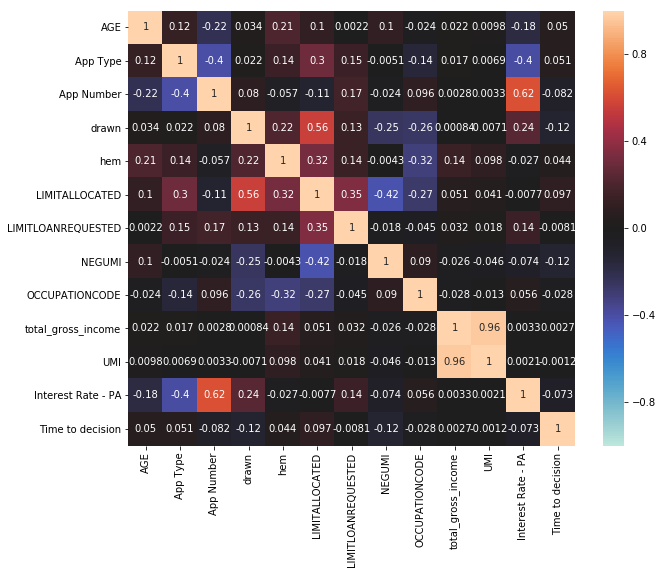

In [26]:
cor=df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot = True, vmin= -1, vmax=1, center=0);

In [27]:
options = ['Approve']
df['LIMITLOANREQUESTED']= df['LIMITLOANREQUESTED'].astype(int)
df['LIMITALLOCATED']=df['LIMITALLOCATED'].astype(int)

In [28]:
approve_df = df[df['Final_Decision'].isin(options)]
print(approve_df[['LIMITLOANREQUESTED','LIMITALLOCATED','Final_Decision']])

       LIMITLOANREQUESTED  LIMITALLOCATED Final_Decision
16                  15000           15000        Approve
17                  15000           15000        Approve
18                  15000           15000        Approve
20                  10000           10000        Approve
22                  10000           10000        Approve
23                  20000           20000        Approve
24                      0           25000        Approve
26                   6000            6000        Approve
27                  25000            8000        Approve
28                   6000            6000        Approve
33                  15000           15000        Approve
34                  15000           15000        Approve
35                   9000            9000        Approve
36                  15000           15000        Approve
37                  15000           15000        Approve
38                  25000            4000        Approve
39                   2000      

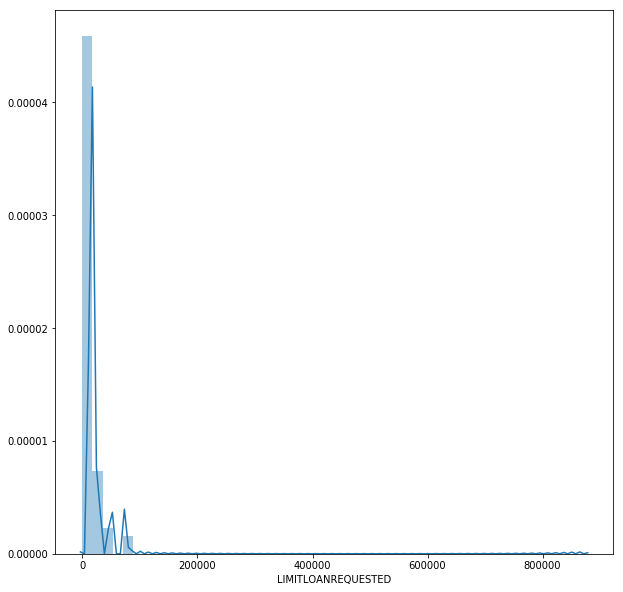

In [29]:
plt.figure(figsize=(10,10))
ax = sns.distplot(approve_df.LIMITLOANREQUESTED, kde=True );

Limit allocated which got approved = 9560


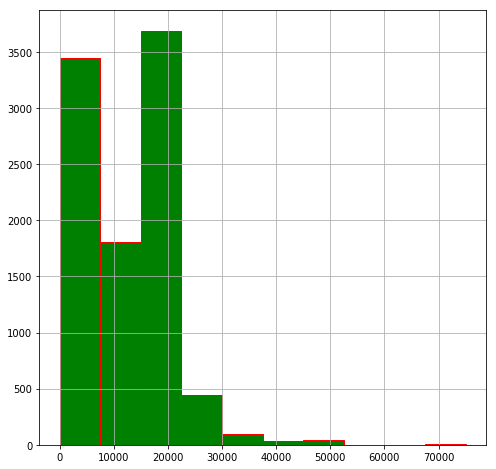

In [30]:
approve_df.LIMITALLOCATED.hist(figsize=(8,8), color= 'g', edgecolor ='red');
print('Limit allocated which got approved =', approve_df.LIMITALLOCATED.count())

In [31]:
options2 = ['Decline']
decline_df = df[df['Final_Decision'].isin(options2)]

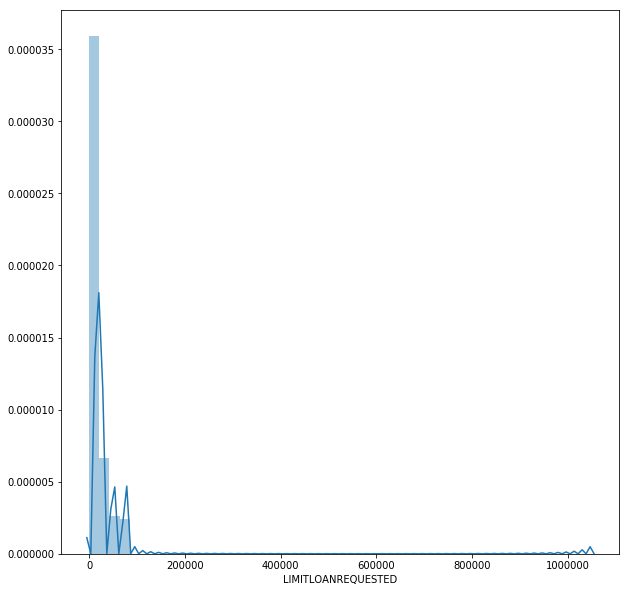

In [32]:
plt.figure(figsize=(10,10))
ax = sns.distplot(decline_df.LIMITLOANREQUESTED, kde=True );

Limit allocated which got declined = 15927


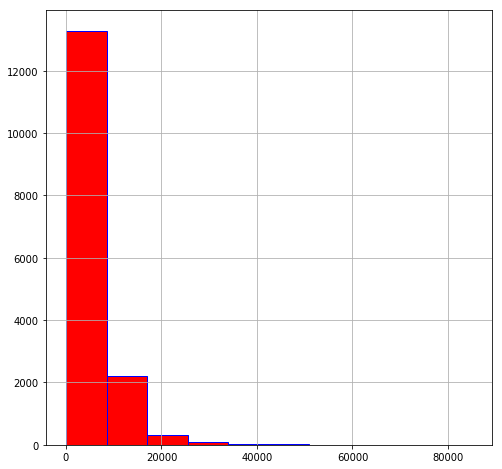

In [33]:
decline_df.LIMITALLOCATED.hist(figsize=(8,8),color= 'r', edgecolor ='blue');
print('Limit allocated which got declined =', decline_df.LIMITALLOCATED.count())

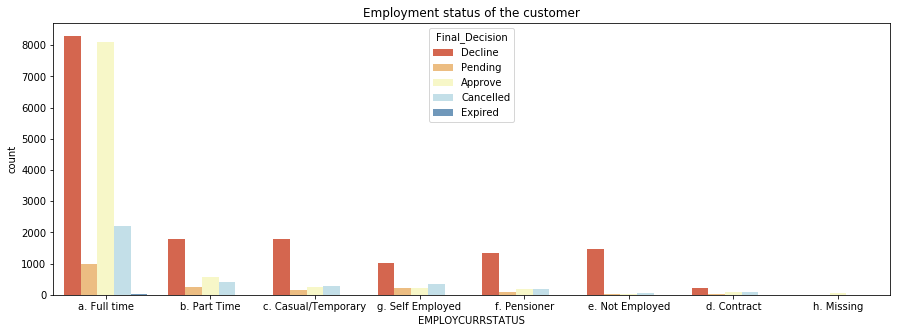

In [34]:
plt.figure(figsize=(15,5))
sns.countplot(x = "EMPLOYCURRSTATUS", data =df, order = df['EMPLOYCURRSTATUS'].value_counts().index, palette="RdYlBu", hue ='Final_Decision')
plt.title('Employment status of the customer')
plt.show();


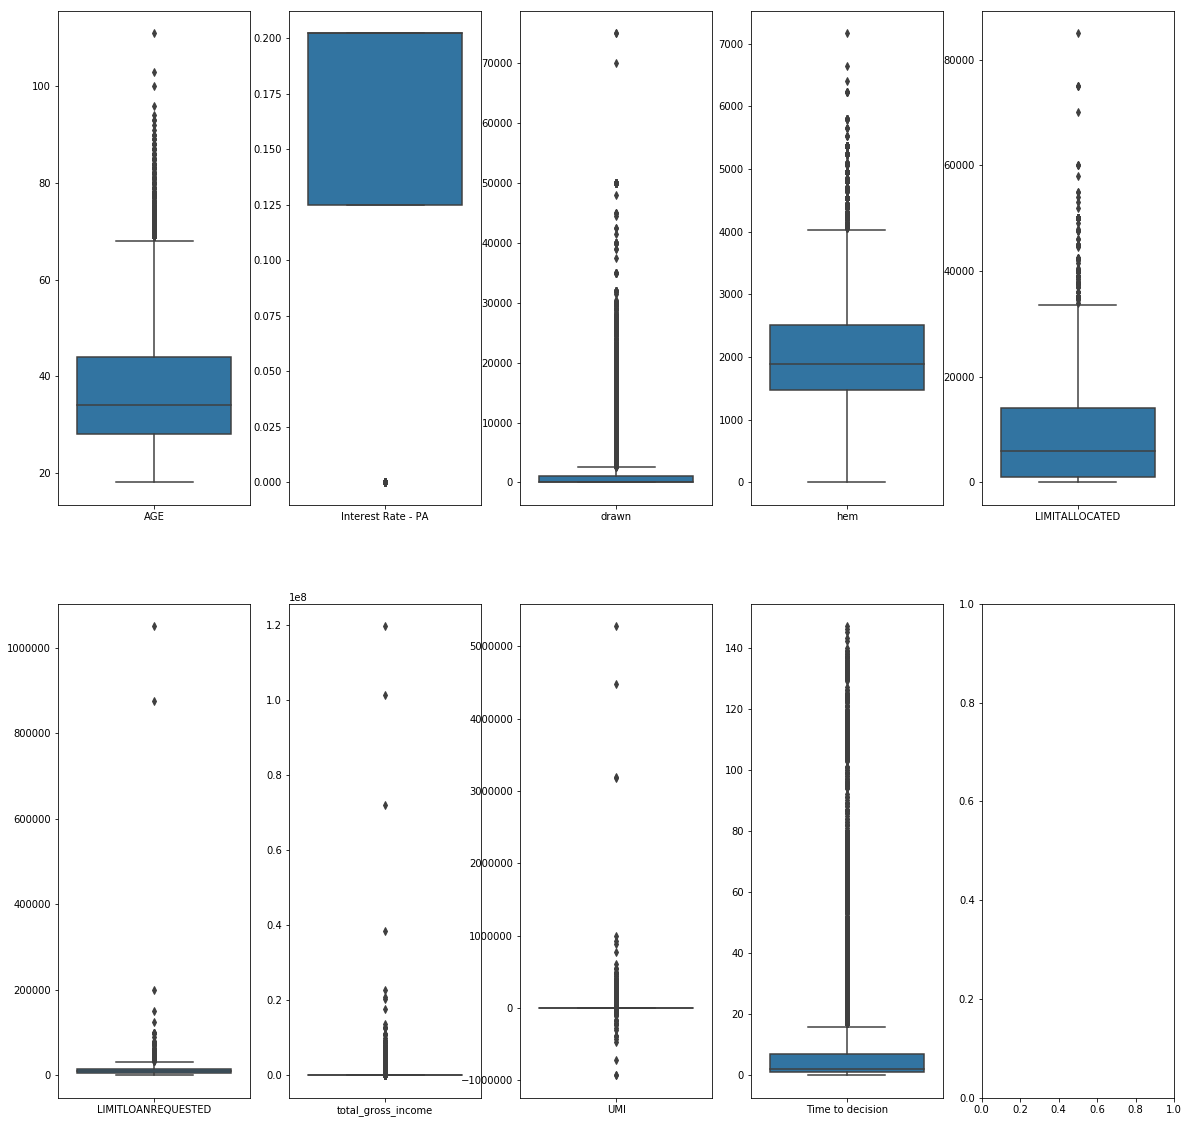

In [35]:
fig, axes = plt.subplots(nrows=2,ncols=5)
fig.set_size_inches(20, 20)
a = sns.boxplot(data=df[['AGE']] ,
                orient = "v" , ax=axes[0][0])

b = sns.boxplot(data=df[['Interest Rate - PA']] ,
                orient = "v" , ax=axes[0][1])

c = sns.boxplot(data=df[['drawn']] ,
                orient = "v" , ax=axes[0][2])

d = sns.boxplot(data=df[['hem']]
                , orient = "v" , ax=axes[0][3])

e = sns.boxplot(data=df[['LIMITALLOCATED']]
                , orient = "v" , ax=axes[0][4])

f = sns.boxplot(data=df[['LIMITLOANREQUESTED']]
                , orient = "v" , ax=axes[1][0])

g = sns.boxplot(data=df[['total_gross_income']]
                , orient = "v" , ax=axes[1][1])

h = sns.boxplot(data=df[['UMI']]
                , orient = "v" , ax=axes[1][2])

i = sns.boxplot(data=df[['Time to decision']]
                , orient = "v" , ax=axes[1][3])

In [36]:
decline_df['Description'].value_counts()

Score Decline (Permanent Residents)             2912
Insufficient UMI Decline                        2481
Unpaid Adverse Bureau - Veda                    2359
High Risk Enquiries                             1590
Income Verifn Reqd - Exist Cust                  578
Internal Conduct Check Fail                      529
Non-Perm Resident                                501
Adverse Account Conduct – Bureau                 475
Fraud Hunter Rule Triggered                      469
Income Verifn Reqd - New Cust                    348
Dup Applicant Name Same Product Type             339
Negative UMI                                     320
Paid Adverse Bureau - Veda                       290
Payday Lender Decline                            262
Score Decline (CLI)                              229
Alloc Limit < Min Prod (Insufficient UMI)        225
Undisclosed Loans                                216
Alloc Limit Increase < Minimum Product Limit     208
High Risk Spend Decline                       

In [37]:
approve_df['Description'].value_counts()

Income Verifn Reqd - Exist Cust                 3016
Income Verifn Reqd - New Cust                   2819
Undisclosed Loans                                745
Fraud Hunter Rule Triggered                      723
Non-Perm Resident                                508
Alloc Limit < Min Prod (Insufficient UMI)        221
Negative UMI                                     217
Undisclosed CC Limits                            196
Undisclosed OFI loan                             143
Alloc Limit Increase < Minimum Product Limit     138
Veda Not Successful                              137
Insufficient UMI Decline                         129
Manual Force Refer                               101
Limit Reqst > Maximum Product Limit               87
Dup Applicnt Name in Last 90 Days                 55
Centrelink Low Income Customer                    41
Most Recent CC App Declined                       36
Undisclosed OFI CC                                33
Private Bank CC                               

In [38]:
decline_df['reason'].value_counts().head(15)

Bureau Decline       5086
Score Decline        3134
Servicing Decline    2572
Policy/IC Decline    1198
Policy Refer         1160
IV Refer              926
Undecl Debt Refer     497
Fraud Refer           478
Servicing Refer       387
Duplicate Decline     338
Error Refer            74
VIP Refer              35
Force Refer            28
Bureau Refer           14
Name: reason, dtype: int64

In [39]:
approve_df['reason'].value_counts().head(15)

IV Refer             5835
Policy Refer         1153
Undecl Debt Refer    1121
Fraud Refer           737
Servicing Refer       247
Error Refer           137
Force Refer           129
Servicing Decline     114
VIP Refer              27
Policy/IC Decline      25
Score Decline          21
Duplicate Decline       9
Bureau Refer            2
Bureau Decline          2
Auto Approve            1
Name: reason, dtype: int64

In [40]:
print(df['State'].value_counts(),'\n')
sns.boxplot(x='State', y="LIMITALLOCATED",  data=df,palette='summer')

NSW      10185
VIC       7836
QLD       5911
WA        3550
SA        1789
ACT        666
TAS        541
NT         347
OTHER       26
Name: State, dtype: int64 



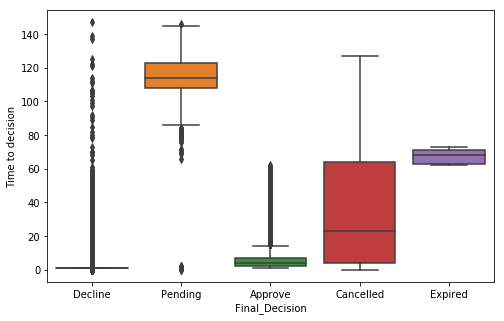

In [41]:
plt.figure(figsize=(8,5))

sns.boxplot(df['Final_Decision'], df['Time to decision']);

In [42]:
index_names = df[(df['Final_Decision'] == 'Pending')].index
index_names2 = df[(df['Final_Decision'] == 'Expired')].index

df.drop(index_names, inplace = True)

In [43]:
df.drop(index_names2, inplace = True)
## Dropped Pending and expired

In [44]:
plt.figure(figsize=(8,5))

sns.boxplot(df['Final_Decision'], df['Time to decision']);

In [45]:
credit_df = df[['AGE','App Number','ApptIncomeVerifiedFlag','BT_flag','customer_type','Description','EMPLOYCURRSTATUS','Final_Decision','LIMITLOANREQUESTED','PERMANENTRESIDENT','Policy_Decision_fs','Product','hem', 'reason','total_gross_income', 'UMI', 'Time to decision']]


In [46]:
credit_df.head(10)

AGE     App Number ApptIncomeVerifiedFlag BT_flag        customer_type  \
0   20  2032883289503                      N       N                  NTB   
1   29  2032913297845                      N       N                  NTB   
2   52  2020287290073                      N       N  Existing-NonLending   
3   55  2032823270310                      N       N     Existing-Lending   
4   57  2020290430042                      N       N     Existing-Lending   
5   35  2020286430015                      N       N     Existing-Lending   
6   45  2020303430051                      N       N     Existing-Lending   
7   62  2020292430011                      N       N     Existing-Lending   
8   86  2020287430044                      N       N     Existing-Lending   
9   19  2033073349390                      N       N                  NTB   

                           Description EMPLOYCURRSTATUS Final_Decision  \
0  Score Decline (Permanent Residents)  e. Not Employed        Decline   
1                 Low Gross Annual Inc  e. Not Employed        Decline   
2           Paid Adverse Bureau - Veda  e. Not Employed        Decline   
3                 Low Gross Annual Inc     a. Full time        Decline   
4             Insufficient UMI Decline  e. Not Employed        Decline   
5             Insufficient UMI Decline  e. Not Employed        Decline   
6             Insufficient UMI Decline  e. Not Employed        Decline   
7             Insufficient UMI Decline  e. Not Employed        Decline   
8             Insufficient UMI Decline     f. Pensioner        Decline   
9                 Low Gross Annual Inc  e. Not Employed        Decline   

   LIMITLOANREQUESTED PERMANENTRESIDENT Policy_Decision_fs  \
0               15000                 Y                  D   
1                1000                 N                  D   
2                1000                 Y                  D   
3               10000                 Y                  D   
4                5000               CLI                  D   
5                5000               CLI                  D   
6                6000               CLI                  D   
7               10000               CLI                  D   
8               10000               CLI                  D   
9                1000                 N                  D   

                    Product     hem             reason  total_gross_income  \
0  ANZ Frequent Flyer Black  1104.0      Score Decline                 0.0   
1                 ANZ First  1969.0  Servicing Decline                 0.0   
2                 ANZ First  1104.0     Bureau Decline                 0.0   
3      ANZ Rewards Platinum  1104.0  Servicing Decline                 0.0   
4              CLI Reactive  1104.0  Servicing Decline                 0.0   
5              CLI Reactive  2442.0  Servicing Decline                 0.0   
6              CLI Reactive  1104.0  Servicing Decline                 0.0   
7              CLI Reactive  1104.0  Servicing Decline                 0.0   
8              CLI Reactive  1104.0  Servicing Decline                 0.0   
9                 ANZ First  1104.0  Servicing Decline                 0.0   

      UMI  Time to decision  
0 -1129.0                 1  
1 -1994.0                 0  
2 -1529.0                 1  
3 -7403.0                 1  
4 -2056.0                 1  
5 -4270.0                 1  
6 -4330.0                 1  
7 -2270.0                 0  
8 -2760.0                 1  
9 -1130.3                 1

In [47]:
print('number of rows', credit_df.shape[0], ',number of columns', credit_df.shape[1])

number of rows 29051 ,number of columns 17


In [48]:
credit_df.to_excel('credit_df.xlsx', index=False)

In [49]:
credit_df = pd.read_excel("credit_df.xlsx")

In [50]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29051 entries, 0 to 29050
Data columns (total 17 columns):
AGE                       29051 non-null int64
App Number                29051 non-null int64
ApptIncomeVerifiedFlag    29051 non-null object
BT_flag                   29051 non-null object
customer_type             29051 non-null object
Description               29051 non-null object
EMPLOYCURRSTATUS          29051 non-null object
Final_Decision            29051 non-null object
LIMITLOANREQUESTED        29051 non-null int64
PERMANENTRESIDENT         29051 non-null object
Policy_Decision_fs        29051 non-null object
Product                   29051 non-null object
hem                       29051 non-null int64
reason                    29051 non-null object
total_gross_income        29051 non-null float64
UMI                       29051 non-null float64
Time to decision          29051 non-null int64
dtypes: float64(2), int64(5), object(10)
memory usage: 3.8+ MB


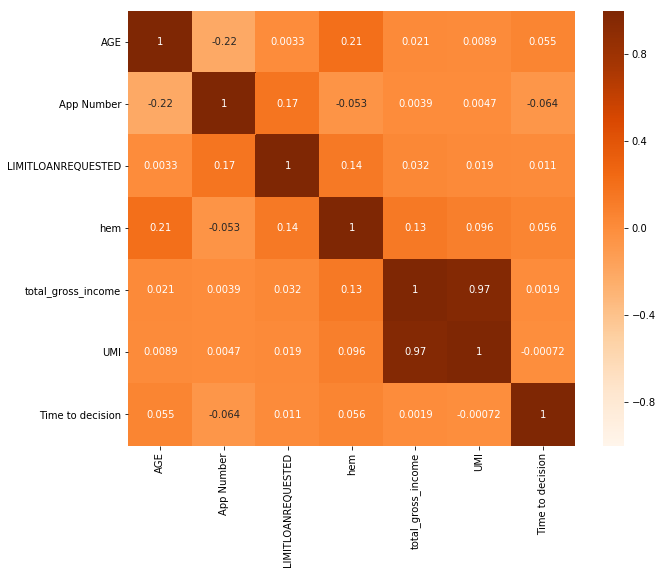

In [51]:
cor=credit_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot = True, vmin= -1, vmax=1, center=0 , cmap = "Oranges" );

In [52]:
##
grouped = df.groupby(['Final_Decision','Triex_used'])
grouped.size()

Final_Decision  Triex_used
Approve         N              9558
                Y                 2
Cancelled       N              3563
                Y                 1
Decline         N             15927
dtype: int64

In [53]:
b=df.groupby(['App Type','Product'])
b.size()

App Type  Product                    
115       ANZ Rewards                     561
130       ANZ Rewards Platinum           1821
133       ANZ Rewards Platinum              3
145       ANZ Rewards                       1
147       ANZ Rewards                       3
157       ANZ Rewards Platinum              1
210       ANZ First                      3605
217       ANZ First                         5
260       VISA Low Rate                  7846
262       VISA Low Rate                     1
420       ANZ Frequent Flyer Black       6218
421       ANZ Frequent Flyer Black         14
422       ANZ Frequent Flyer Black         15
430       ANZ Rewards Black               950
431       ANZ Rewards Black                17
432       ANZ Rewards Black                 4
450       ANZ Travel Platinum               1
505       ANZ Platinum                   2866
517       ANZ Platinum                      1
550       ANZ Frequent Flyer Platinum    1046
570       ANZ Frequent Flyer Platinum     

In [54]:
a = df.groupby(['Final_Decision','ApptIncomeVerifiedFlag'])
a.size()

Final_Decision  ApptIncomeVerifiedFlag
Approve         N                           380
                P                             2
                Y                          9178
Cancelled       N                          3190
                P                             1
                Y                           373
Decline         N                         15374
                Y                           553
dtype: int64

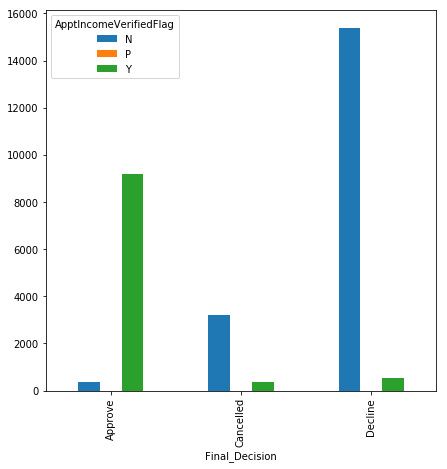

In [55]:
fig,ax = plt.subplots(figsize=(7,7))

credit_df.groupby(['Final_Decision','ApptIncomeVerifiedFlag']).count()['total_gross_income'].unstack().plot(ax=ax, kind='bar' )

In [56]:
grouped = credit_df.groupby(['Final_Decision','PERMANENTRESIDENT'])
print(grouped.size())

Final_Decision  PERMANENTRESIDENT
Approve         CLI                   1417
                N                      627
                Y                     7516
Cancelled       CLI                    668
                N                      530
                Y                     2366
Decline         CLI                   1714
                N                     1587
                Y                    12626
dtype: int64


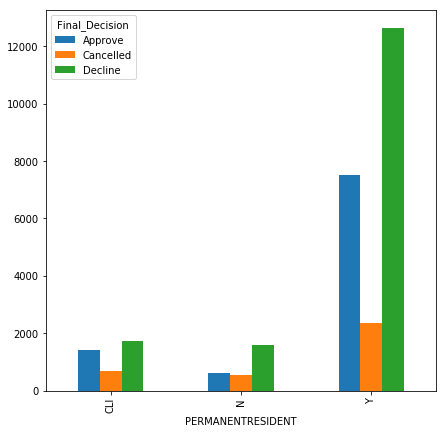

In [57]:
fig,ax = plt.subplots(figsize=(7,7))

credit_df.groupby(['Final_Decision','PERMANENTRESIDENT']).count()['total_gross_income'].unstack(level=0).plot(ax=ax, kind='bar')

Internet      25444
Branch         2319
Phone          1152
Paper Form      136
Name: Channel, dtype: int64

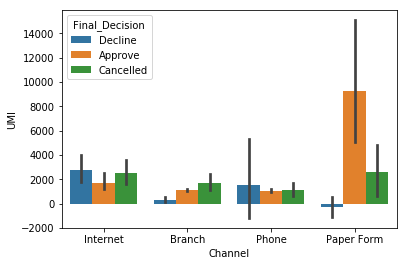

In [58]:
sns.barplot(x='Channel', y= 'UMI', data=df, hue='Final_Decision')
df['Channel'].value_counts()

In [59]:
df.groupby(['Final_Decision','Channel']).count()['Policy_Decision_fs'].unstack(level=0).plot(ax=ax, kind = "bar", stacked= True);

In [60]:
## sns.swarmplot(x='Final_Decision', y= 'UMI', data=df, hue='Final_Decision', size = 20)

In [61]:
df['Product'].value_counts()

VISA Low Rate                  7847
ANZ Frequent Flyer Black       6247
CLI Reactive                   3799
ANZ First                      3612
ANZ Platinum                   2867
ANZ Rewards Platinum           1825
ANZ Frequent Flyer Platinum    1053
ANZ Rewards Black               971
ANZ Rewards                     565
ANZ Frequent Flyer              264
ANZ Travel Platinum               1
Name: Product, dtype: int64

In [62]:
grouped1 = credit_df.groupby(['Policy_Decision_fs','Final_Decision'])
print(grouped1.size())

Policy_Decision_fs  Final_Decision
A                   Approve               1
D                   Approve             171
                    Cancelled            50
                    Decline           12328
R                   Approve            9388
                    Cancelled          3514
                    Decline            3599
dtype: int64


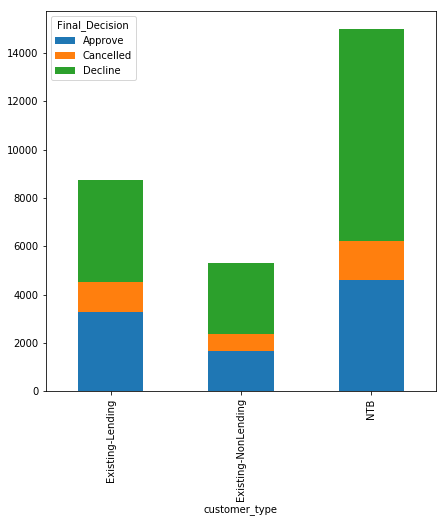

In [63]:
fig,ax = plt.subplots(figsize=(7,7))

credit_df.groupby(['Final_Decision','customer_type']).count()['Policy_Decision_fs'].unstack(level=0).plot(ax=ax, kind = "bar", stacked= True) 

In [64]:
grouped1 = credit_df.groupby(['Policy_Decision_fs','Final_Decision'])
print(grouped1.size())

Policy_Decision_fs  Final_Decision
A                   Approve               1
D                   Approve             171
                    Cancelled            50
                    Decline           12328
R                   Approve            9388
                    Cancelled          3514
                    Decline            3599
dtype: int64


In [65]:
credit_df1=credit_df.copy()

In [66]:
grouped = credit_df.groupby(['Final_Decision','EMPLOYCURRSTATUS'])
print(grouped.size())

Final_Decision  EMPLOYCURRSTATUS   
Approve         a. Full time           8112
                b. Part Time            579
                c. Casual/Temporary     261
                d. Contract             104
                e. Not Employed          36
                f. Pensioner            177
                g. Self Employed        221
                h. Missing               70
Cancelled       a. Full time           2212
                b. Part Time            418
                c. Casual/Temporary     280
                d. Contract              74
                e. Not Employed          69
                f. Pensioner            171
                g. Self Employed        340
Decline         a. Full time           8299
                b. Part Time           1797
                c. Casual/Temporary    1794
                d. Contract             212
                e. Not Employed        1461
                f. Pensioner           1337
                g. Self Employed       1

In [67]:
for feature in credit_df:
    if credit_df[feature].dtype == 'object':
        print('feature:', feature)
        print(pd.Categorical(credit_df[feature].unique()))
        print(pd.Categorical(credit_df[feature].unique()).codes)
        credit_df[feature]=pd.Categorical(credit_df[feature]).codes

feature: ApptIncomeVerifiedFlag
[N, Y, P]
Categories (3, object): [N, P, Y]
[0 2 1]
feature: BT_flag
[N, Y]
Categories (2, object): [N, Y]
[0 1]
feature: customer_type
[NTB, Existing-NonLending, Existing-Lending]
Categories (3, object): [Existing-Lending, Existing-NonLending, NTB]
[2 1 0]
feature: Description
[Score Decline (Permanent Residents), Low Gross Annual Inc, Paid Adverse Bureau - Veda, Insufficient UMI Decline, Adverse Account Conduct – Bureau, ..., Cards Auto Decision Complete, Low Living Expense, Hi Risk Detected, Lending Exclusion, High Existing Exposure]
Length: 59
Categories (59, object): [Account Opened < 4  months, Adverse Account Conduct – Bureau, Adverse Block Code, Alloc Limit < Min Prod (Insufficient UMI), ..., Unpaid Adverse Bureau - Veda, Unpaid Adverse Bureau DnB, Unpaid Def Paid Judgmnt Summ DnB, Veda Not Successful]
[44 30 39 24  1 23 49 57 53 22 55 51 18 54 38 37 11 13  3 16 43 35 27  0  4
 36 58 40 10 29 52 12 19 25 56 20 42 33  2 48 47 26 34  6 32  7 21 15 

In [68]:
credit_df.head()

AGE     App Number  ApptIncomeVerifiedFlag  BT_flag  customer_type  \
0   20  2032883289503                       0        0              2   
1   29  2032913297845                       0        0              2   
2   52  2020287290073                       0        0              1   
3   55  2032823270310                       0        0              0   
4   57  2020290430042                       0        0              0   

   Description  EMPLOYCURRSTATUS  Final_Decision  LIMITLOANREQUESTED  \
0           44                 4               2               15000   
1           30                 4               2                1000   
2           39                 4               2                1000   
3           30                 0               2               10000   
4           24                 4               2                5000   

   PERMANENTRESIDENT  Policy_Decision_fs  Product   hem  reason  \
0                  2                   1        2  1104      10   
1                  1                   1        0  1969      11   
2                  2                   1        0  1104       1   
3                  2                   1        7  1104      11   
4                  0                   1        9  1104      11   

   total_gross_income     UMI  Time to decision  
0                 0.0 -1129.0                 1  
1                 0.0 -1994.0                 0  
2                 0.0 -1529.0                 1  
3                 0.0 -7403.0                 1  
4                 0.0 -2056.0                 1

In [69]:
credit_df.Description.replace([24,51,37,3,49,53,30,26,52,25,10, 31,50,55,18,1,39,58,40,36,57,56,32,54,27,4,29,0,6,42,16,2,14,17,8,22,23,9,34,20,46,44,43,19,33,45,7,11,12,35,21,13,48,5,15,38,41,47,28],[1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8],inplace=True)
credit_df.head()


AGE     App Number  ApptIncomeVerifiedFlag  BT_flag  customer_type  \
0   20  2032883289503                       0        0              2   
1   29  2032913297845                       0        0              2   
2   52  2020287290073                       0        0              1   
3   55  2032823270310                       0        0              0   
4   57  2020290430042                       0        0              0   

   Description  EMPLOYCURRSTATUS  Final_Decision  LIMITLOANREQUESTED  \
0            5                 4               2               15000   
1            1                 4               2                1000   
2            2                 4               2                1000   
3            1                 0               2               10000   
4            1                 4               2                5000   

   PERMANENTRESIDENT  Policy_Decision_fs  Product   hem  reason  \
0                  2                   1        2  1104      10   
1                  1                   1        0  1969      11   
2                  2                   1        0  1104       1   
3                  2                   1        7  1104      11   
4                  0                   1        9  1104      11   

   total_gross_income     UMI  Time to decision  
0                 0.0 -1129.0                 1  
1                 0.0 -1994.0                 0  
2                 0.0 -1529.0                 1  
3                 0.0 -7403.0                 1  
4                 0.0 -2056.0                 1

In [70]:
credit_df.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [71]:
#Outlier treatment 
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [72]:
lrc,urc=remove_outlier(credit_df['AGE'])
credit_df['AGE']=np.where(credit_df['AGE']>urc,urc,credit_df['AGE'])
credit_df['AGE']=np.where(credit_df['AGE']<lrc,lrc,credit_df['AGE'])


lrr,urr=remove_outlier(credit_df['LIMITLOANREQUESTED'])
credit_df['LIMITLOANREQUESTED']=np.where(credit_df['LIMITLOANREQUESTED']>urr,urr,credit_df['LIMITLOANREQUESTED'])
credit_df['LIMITLOANREQUESTED']=np.where(credit_df['LIMITLOANREQUESTED']<lrr,lrr,credit_df['LIMITLOANREQUESTED'])


lrt,urt=remove_outlier(credit_df['total_gross_income'])
credit_df['total_gross_income']=np.where(credit_df['total_gross_income']>urt,urt,credit_df['total_gross_income'])
credit_df['total_gross_income']=np.where(credit_df['total_gross_income']<lrt,lrt,credit_df['total_gross_income'])

lrt,urt=remove_outlier(credit_df['total_gross_income'])
credit_df['total_gross_income']=np.where(credit_df['total_gross_income']>urt,urt,credit_df['total_gross_income'])
credit_df['total_gross_income']=np.where(credit_df['total_gross_income']<lrt,lrt,credit_df['total_gross_income'])

lru,uru=remove_outlier(credit_df['UMI'])
credit_df['UMI']=np.where(credit_df['UMI']>uru,uru,credit_df['UMI'])
credit_df['UMI']=np.where(credit_df['UMI']<lru,lru,credit_df['UMI'])

lrh,urh=remove_outlier(credit_df['hem'])
credit_df['hem']=np.where(credit_df['hem']>urh,urh,credit_df['UMI'])
credit_df['hem']=np.where(credit_df['hem']<lrh,lrh,credit_df['UMI'])

lrz,urz=remove_outlier(credit_df['Time to decision'])
credit_df['Time to decision']=np.where(credit_df['Time to decision']>urz,urz,credit_df['Time to decision'])
credit_df['Time to decision']=np.where(credit_df['Time to decision']<lrz,lrz,credit_df['Time to decision'])


In [73]:
credit_df.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

In [74]:
X=credit_df.drop(["Final_Decision","App Number","total_gross_income", "Time to decision"], axis =1)
y=credit_df.pop("Final_Decision")

In [75]:
from scipy.stats import zscore

df_new=X.apply(zscore)
df_new.head()

AGE  ApptIncomeVerifiedFlag   BT_flag  customer_type  Description  \
0 -1.405708               -0.730383 -0.388634       0.893469     0.806001   
1 -0.647267               -0.730383 -0.388634       0.893469    -1.215071   
2  1.290970               -0.730383 -0.388634      -0.245859    -0.709803   
3  1.543783               -0.730383 -0.388634      -1.385186    -1.215071   
4  1.712326               -0.730383 -0.388634      -1.385186    -1.215071   

   EMPLOYCURRSTATUS  LIMITLOANREQUESTED  PERMANENTRESIDENT  \
0          1.499100            0.231237           0.508148   
1          1.499100           -1.203441          -0.919255   
2          1.499100           -1.203441           0.508148   
3         -0.603208           -0.281148           0.508148   
4          1.499100           -0.793533          -2.346658   

   Policy_Decision_fs   Product       hem    reason       UMI  
0           -1.146415 -0.942640 -0.913303  0.749352 -1.449003  
1           -1.146415 -1.472436 -0.913303  1.028083 -2.102514  
2           -1.146415 -1.472436 -0.913303 -1.759224 -1.751205  
3           -1.146415  0.381850 -0.913303  1.028083 -2.337701  
4           -1.146415  0.911646 -0.913303  1.028083 -2.149356

In [76]:
#PCA
#step 1 - create covariance matrix

cov_matrix =np.cov(df_new.T)
print('Covariance matrix \n%s', cov_matrix)

Covariance matrix 
%s [[ 1.00003442  0.0640344   0.11978539 -0.16985034 -0.18439481  0.13733381
   0.03018554 -0.05412586  0.11023449  0.13981782 -0.06836841  0.14639354
  -0.08896003]
 [ 0.0640344   1.00003442  0.07192362 -0.07709439  0.14915602 -0.27627152
   0.00757309 -0.01676477  0.61053865  0.00466353  0.08871482  0.14180033
   0.14898233]
 [ 0.11978539  0.07192362  1.00003442  0.12735589 -0.08603426 -0.11151213
   0.04400499  0.17944455  0.07776981  0.34015674 -0.10815394  0.11439074
  -0.10764586]
 [-0.16985034 -0.07709439  0.12735589  1.00003442  0.10630052  0.00983302
   0.09345626  0.43423796 -0.1276567  -0.16928373  0.08483343 -0.10982129
   0.09024598]
 [-0.18439481  0.14915602 -0.08603426  0.10630052  1.00003442 -0.08184299
   0.00777201 -0.1111873   0.28246147 -0.0477093   0.25307953 -0.0663004
   0.29005845]
 [ 0.13733381 -0.27627152 -0.11151213  0.00983302 -0.08184299  1.00003442
  -0.05884564  0.03823548 -0.19311345 -0.05400524 -0.12640962 -0.10997864
  -0.14996193]
 

In [77]:
df_corr= df_new
df_corr.corr()

AGE  ApptIncomeVerifiedFlag   BT_flag  \
AGE                     1.000000                0.064032  0.119781   
ApptIncomeVerifiedFlag  0.064032                1.000000  0.071921   
BT_flag                 0.119781                0.071921  1.000000   
customer_type          -0.169844               -0.077092  0.127352   
Description            -0.184388                0.149151 -0.086031   
EMPLOYCURRSTATUS        0.137329               -0.276262 -0.111508   
LIMITLOANREQUESTED      0.030184                0.007573  0.044003   
PERMANENTRESIDENT      -0.054124               -0.016764  0.179438   
Policy_Decision_fs      0.110231                0.610518  0.077767   
Product                 0.139813                0.004663  0.340145   
hem                    -0.068366                0.088712 -0.108150   
reason                  0.146389                0.141795  0.114387   
UMI                    -0.088957                0.148977 -0.107642   

                        customer_type  Description  EMPLOYCURRSTATUS  \
AGE                         -0.169844    -0.184388          0.137329   
ApptIncomeVerifiedFlag      -0.077092     0.149151         -0.276262   
BT_flag                      0.127352    -0.086031         -0.111508   
customer_type                1.000000     0.106297          0.009833   
Description                  0.106297     1.000000         -0.081840   
EMPLOYCURRSTATUS             0.009833    -0.081840          1.000000   
LIMITLOANREQUESTED           0.093453     0.007772         -0.058844   
PERMANENTRESIDENT            0.434223    -0.111183          0.038234   
Policy_Decision_fs          -0.127652     0.282452         -0.193107   
Product                     -0.169278    -0.047708         -0.054003   
hem                          0.084831     0.253071         -0.126405   
reason                      -0.109818    -0.066298         -0.109975   
UMI                          0.090243     0.290048         -0.149957   

                        LIMITLOANREQUESTED  PERMANENTRESIDENT  \
AGE                               0.030184          -0.054124   
ApptIncomeVerifiedFlag            0.007573          -0.016764   
BT_flag                           0.044003           0.179438   
customer_type                     0.093453           0.434223   
Description                       0.007772          -0.111183   
EMPLOYCURRSTATUS                 -0.058844           0.038234   
LIMITLOANREQUESTED                1.000000           0.056969   
PERMANENTRESIDENT                 0.056969           1.000000   
Policy_Decision_fs                0.040599          -0.131615   
Product                          -0.082860          -0.307246   
hem                               0.064717           0.008176   
reason                            0.008244          -0.083060   
UMI                               0.045098           0.022595   

                        Policy_Decision_fs   Product       hem    reason  \
AGE                               0.110231  0.139813 -0.068366  0.146389   
ApptIncomeVerifiedFlag            0.610518  0.004663  0.088712  0.141795   
BT_flag                           0.077767  0.340145 -0.108150  0.114387   
customer_type                    -0.127652 -0.169278  0.084831 -0.109818   
Description                       0.282452 -0.047708  0.253071 -0.066298   
EMPLOYCURRSTATUS                 -0.193107 -0.054003 -0.126405 -0.109975   
LIMITLOANREQUESTED                0.040599 -0.082860  0.064717  0.008244   
PERMANENTRESIDENT                -0.131615 -0.307246  0.008176 -0.083060   
Policy_Decision_fs                1.000000  0.014940  0.109579  0.252308   
Product                           0.014940  1.000000 -0.082662  0.067748   
hem                               0.109579 -0.082662  1.000000 -0.139628   
reason                            0.252308  0.067748 -0.139628  1.000000   
UMI                               0.144320 -0.087176  0.947731 -0.168160   

                             UMI  
AGE                    -0.08

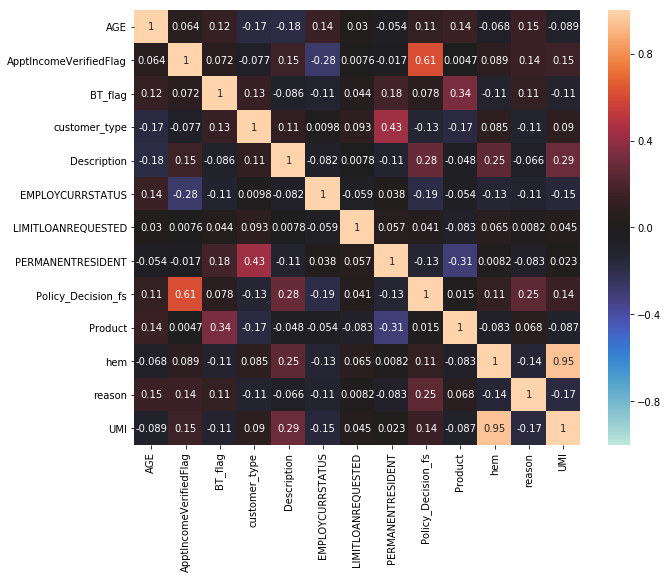

In [78]:
cor=df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor,annot = True, vmin= -1, vmax=1, center=0);

In [79]:
#step 2- Get eigen values and eigen vector
eig_vals, eig_vec =np.linalg.eig(cov_matrix)
print('\n Eigen Values\n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vec)


 Eigen Values
 %s [ 2.3999      2.05101357  1.52360764  0.04853438  1.26314894  1.11871445
  0.97577962  0.91461838  0.80544728  0.60770377  0.33354994  0.54156266
  0.41686687]


Eigen Vectors 
 %s [[-0.1322649  -0.24388956 -0.00686358  0.0094002  -0.23411825  0.66157447
   0.17897982 -0.09865752  0.0796217   0.61685715  0.04196448  0.00373675
  -0.00135521]
 [ 0.27662642 -0.40221463  0.24302942 -0.0448195   0.21957708  0.04107836
   0.17117431  0.04792734  0.37908564 -0.18606772  0.5887892  -0.27390942
   0.1382162 ]
 [-0.09576803 -0.17626711  0.45003898  0.00265239 -0.52971778 -0.14745537
   0.08133835 -0.10173873  0.01175654 -0.18475343  0.1704787   0.44173472
  -0.42360473]
 [ 0.08612021  0.35036876  0.47559885  0.00254007 -0.05263676 -0.12439673
   0.11384913 -0.20334509 -0.19576781  0.23993959 -0.01850449 -0.63724677
  -0.26219535]
 [ 0.35229767 -0.03034566 -0.05665717 -0.02257853  0.15888589 -0.31797907
   0.1083085  -0.5995459  -0.21604662  0.35159536  0.17554871  0.34926433


In [80]:
tot = sum(eig_vals)
var_exp = [(i/tot)* 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp=np.cumsum(var_exp)
print("cumulative Variance Explained", cum_var_exp)

cumulative Variance Explained [  18.46013378   34.23661819   45.95627351   55.67246938   64.27766893
   71.78340766   78.81869148   85.0142265    89.68870999   93.85443317
   97.06099105   99.6266715   100.        ]


In [81]:
plt.figure(figsize = (7,5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label ='Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', Label = " cumulative variance")
plt.ylabel('Explained Variance Ratio', fontsize=15)
plt.xlabel('Principal components', fontsize=15)
plt.title('EVR', fontsize=15)
plt.legend(loc = 'best')
plt.grid()
plt.show()

In [82]:
# dimentionality reduction 17-8
pca =PCA(n_components= 8)
data_reduced = pca.fit_transform(df_new)
data_reduced.transpose()

array([[-1.51072714, -2.7511081 , -2.5178742 , ..., -3.69750678,
         2.90360598,  2.42912089],
       [ 1.7048722 ,  1.0375244 ,  1.66493254, ..., -0.25493425,
         1.4600821 ,  0.11299149],
       [-0.45038606,  0.34049937,  0.66158289, ..., -1.55015779,
         0.35625837,  1.88185056],
       ..., 
       [ 0.03789677, -0.69103781, -1.53716301, ...,  1.01580907,
        -0.29628103,  1.19795232],
       [ 1.11224103, -0.39525758,  0.16439677, ...,  1.95977836,
         2.9288824 ,  0.21005292],
       [-1.34750179, -1.28557916,  1.39721405, ..., -1.19994527,
        -0.88172562, -1.7987828 ]])

<function matplotlib.pyplot.show>

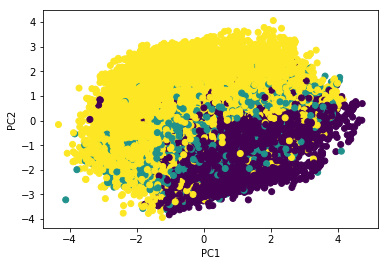

In [83]:
plt.scatter(data_reduced[:,0], data_reduced[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show

In [84]:
pca.components_

array([[-0.1322649 ,  0.27662642, -0.09576803,  0.08612021,  0.35229767,
        -0.22083799,  0.07087972,  0.00161315,  0.28599609, -0.12158823,
         0.54132247, -0.07528993,  0.56232549],
       [-0.24388956, -0.40221463, -0.17626711,  0.35036876, -0.03034566,
         0.2094325 ,  0.03785957,  0.32621147, -0.45841615, -0.3074548 ,
         0.14408035, -0.35969107,  0.13218239],
       [ 0.00686358, -0.24302942, -0.45003898, -0.47559885,  0.05665717,
         0.20226516, -0.21324462, -0.55647811, -0.16585953,  0.12229253,
         0.15009061, -0.17398778,  0.13279338],
       [ 0.23411825, -0.21957708,  0.52971778,  0.05263676, -0.15888589,
        -0.02463064,  0.01818075, -0.02071426, -0.23337053,  0.59267925,
         0.29953165, -0.1277439 ,  0.27426952],
       [ 0.66157447,  0.04107836, -0.14745537, -0.12439673, -0.31797907,
         0.3661486 ,  0.29837774,  0.15969488,  0.08500923, -0.28514982,
         0.19483473,  0.14555119,  0.16132026],
       [-0.17897982, -0.171174

In [85]:
pca.explained_variance_ratio_

array([ 0.18460134,  0.15776484,  0.11719655,  0.09716196,  0.086052  ,
        0.07505739,  0.07035284,  0.06195535])

In [86]:
principalDf = pd.DataFrame(data = data_reduced
             , columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.510727  1.704872 -0.450386 -1.556720 -0.702366  0.037897  1.112241   
1 -2.751108  1.037524  0.340499 -1.583395 -0.127751 -0.691038 -0.395258   
2 -2.517874  1.664933  0.661583 -0.847021  1.014528 -1.537163  0.164397   
3 -3.062912 -0.836155  0.218582 -0.116897  0.771944  0.413418 -1.278280   
4 -3.548903 -1.525631  2.432663  0.286256  0.923735 -0.198192  0.145862   

        PC8  Final_Decision  
0 -1.347502               2  
1 -1.285579               2  
2  1.397214               2  
3 -0.178395               2  
4 -0.692559               2

In [87]:
df_comp = pd.DataFrame(pca.components_, columns = list(df_new))
df_comp.head()

AGE  ApptIncomeVerifiedFlag   BT_flag  customer_type  Description  \
0 -0.132265                0.276626 -0.095768       0.086120     0.352298   
1 -0.243890               -0.402215 -0.176267       0.350369    -0.030346   
2  0.006864               -0.243029 -0.450039      -0.475599     0.056657   
3  0.234118               -0.219577  0.529718       0.052637    -0.158886   
4  0.661574                0.041078 -0.147455      -0.124397    -0.317979   

   EMPLOYCURRSTATUS  LIMITLOANREQUESTED  PERMANENTRESIDENT  \
0         -0.220838            0.070880           0.001613   
1          0.209432            0.037860           0.326211   
2          0.202265           -0.213245          -0.556478   
3         -0.024631            0.018181          -0.020714   
4          0.366149            0.298378           0.159695   

   Policy_Decision_fs   Product       hem    reason       UMI  
0            0.285996 -0.121588  0.541322 -0.075290  0.562325  
1           -0.458416 -0.307455  0.144080 -0.359691  0.132182  
2           -0.165860  0.122293  0.150091 -0.173988  0.132793  
3           -0.233371  0.592679  0.299532 -0.127744  0.274270  
4            0.085009 -0.285150  0.194835  0.145551  0.161320

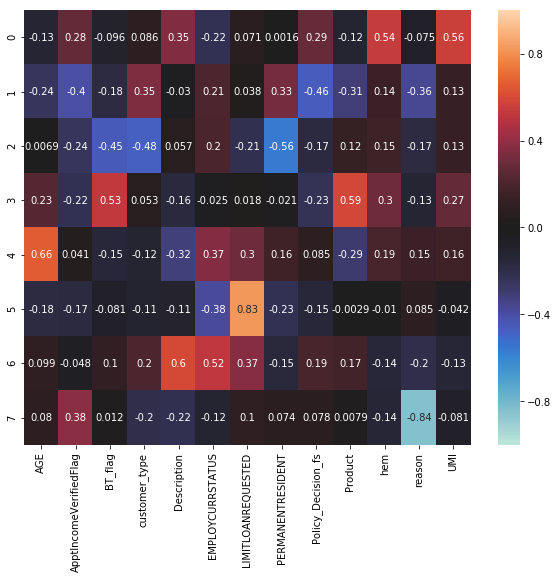

In [88]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_comp,annot = True, vmin= -1, vmax=1, center=0);

In [89]:
k_means = KMeans(n_clusters = 8)
k_means.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [90]:
wss=[]

for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(df_new)
    wss.append(KM.inertia_)

In [91]:
wss

[377663.0,
 328140.14458038937,
 296543.91315846558,
 265895.19686134893,
 243731.98224043855,
 226093.8704087045,
 214891.33774051938,
 206693.15746115794,
 199740.75973784958,
 194023.77432613334]

In [92]:
plt.plot(range(1,11),wss)

In [93]:
k_means = KMeans(n_clusters = 5, random_state=1)
k_means.fit(df_new)
labels= k_means.labels_
print(labels)

[0 0 0 ..., 0 4 4]


In [94]:
#silhouette_score(df_new, labels, random_state=None)

In [95]:
df["labels"]=labels
df.head()

AGE  App Type     App Number APPNPARMSAPPNTYPE APPNSCORESTRATEGYDECISION  \
0   20       420  2032883289503               STD                         D   
1   29       210  2032913297845               STD                         D   
2   52       210  2020287290073               STD                         A   
3   55       130  2032823270310               STD                         A   
4   57       600  2020290430042               CLI                         A   

  ApptIncomeVerifiedFlag BT_flag   Channel        customer_type  \
0                      N       N  Internet                  NTB   
1                      N       N  Internet                  NTB   
2                      N       N    Branch  Existing-NonLending   
3                      N       N  Internet     Existing-Lending   
4                      N       N  Internet     Existing-Lending   

                           Description   ...    reasoncode_2_fs State  \
0  Score Decline (Permanent Residents)   ...               DA02   QLD   
1                 Low Gross Annual Inc   ...               RA03   NSW   
2           Paid Adverse Bureau - Veda   ...               DA02   VIC   
3                 Low Gross Annual Inc   ...               RA01   QLD   
4             Insufficient UMI Decline   ...               RL08   VIC   

  total_gross_income  Triex_used     UMI Interest Rate - PA Application Date  \
0                0.0           N -1129.0             0.2024       2020-10-14   
1                0.0           N -1994.0             0.2024       2020-10-17   
2                0.0           N -1529.0             0.2024       2020-10-13   
3                0.0           N -7403.0             0.2024       2020-10-08   
4                0.0           N -2056.0             0.0000       2020-10-16   

           App Final date  Time to decision  labels  
0 2020-10-14 17:52:34.207                 1       0  
1 2020-10-17 10:15:58.397                 0       0  
2 2020-10-13 15:02:44.590                 1       0  
3 2020-10-08 08:55:01.250                 1       0  
4 2020-10-16 16:54:37.030                 1       2  

[5 rows x 39 columns]

In [96]:
X=df_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [97]:
X.columns

Index(['AGE', 'ApptIncomeVerifiedFlag', 'BT_flag', 'customer_type',
       'Description', 'EMPLOYCURRSTATUS', 'LIMITLOANREQUESTED',
       'PERMANENTRESIDENT', 'Policy_Decision_fs', 'Product', 'hem', 'reason',
       'UMI'],
      dtype='object')

In [98]:
X.head()

AGE  ApptIncomeVerifiedFlag   BT_flag  customer_type  Description  \
0 -1.405708               -0.730383 -0.388634       0.893469     0.806001   
1 -0.647267               -0.730383 -0.388634       0.893469    -1.215071   
2  1.290970               -0.730383 -0.388634      -0.245859    -0.709803   
3  1.543783               -0.730383 -0.388634      -1.385186    -1.215071   
4  1.712326               -0.730383 -0.388634      -1.385186    -1.215071   

   EMPLOYCURRSTATUS  LIMITLOANREQUESTED  PERMANENTRESIDENT  \
0          1.499100            0.231237           0.508148   
1          1.499100           -1.203441          -0.919255   
2          1.499100           -1.203441           0.508148   
3         -0.603208           -0.281148           0.508148   
4          1.499100           -0.793533          -2.346658   

   Policy_Decision_fs   Product       hem    reason       UMI  
0           -1.146415 -0.942640 -0.913303  0.749352 -1.449003  
1           -1.146415 -1.472436 -0.913303  1.028083 -2.102514  
2           -1.146415 -1.472436 -0.913303 -1.759224 -1.751205  
3           -1.146415  0.381850 -0.913303  1.028083 -2.337701  
4           -1.146415  0.911646 -0.913303  1.028083 -2.149356

In [99]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)

X_train (20335, 13)
X_test (8716, 13)
train_labels (20335,)
test_labels (8716,)


In [100]:
model = LogisticRegression(solver='newton-cg',max_iter=20000,penalty='l2',verbose=True,n_jobs=1)
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=True, warm_start=False)

In [101]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [102]:
model_score = model.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.87207434603


In [103]:
model_score = model.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.873862798131


In [104]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');

In [105]:
print(classification_report(y_train, ytrain_predict))

             precision    recall  f1-score   support

          0       0.92      0.95      0.93      6688
          1       0.57      0.58      0.58      2466
          2       0.91      0.90      0.90     11181

avg / total       0.87      0.87      0.87     20335



In [106]:
print(classification_report(y_test, ytest_predict))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94      2872
          1       0.57      0.59      0.58      1098
          2       0.91      0.89      0.90      4746

avg / total       0.87      0.87      0.87      8716



In [107]:
def run_LR(X_train, X_test, y_train, y_test):
    LR = LogisticRegression(solver='newton-cg',max_iter=20000,penalty='l2',verbose=True,n_jobs=1)
    LR.fit(X_train,y_train)
    y_pred=LR.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))

In [108]:
from sklearn.feature_selection import RFE
model1 = LogisticRegression()
#Initializing RFE model
selector = RFE(model1, n_features_to_select=13, step=1)
#Transforming data using RFE
selector = selector.fit(X_train,y_train)  
#Fitting the data to model
selector.n_features_
print(selector.support_)
print(selector.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


In [109]:
#LR
df1 = pd.DataFrame({'Feature': X_train.columns, 'Rank': selector.ranking_})
df1[df1['Rank']== 1]

Feature  Rank
0                      AGE     1
1   ApptIncomeVerifiedFlag     1
2                  BT_flag     1
3            customer_type     1
4              Description     1
5         EMPLOYCURRSTATUS     1
6       LIMITLOANREQUESTED     1
7        PERMANENTRESIDENT     1
8       Policy_Decision_fs     1
9                  Product     1
10                     hem     1
11                  reason     1
12                     UMI     1

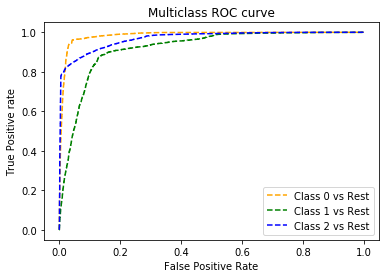

In [110]:
fpr = {}
tpr = {}
thresh ={}
n_class = 3
pred = model.predict(X_train)
pred_prob = model.predict_proba(X_train)


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_train, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

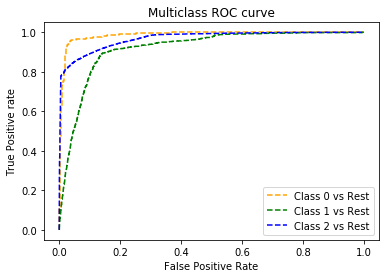

In [111]:
fpr = {}
tpr = {}
thresh ={}
n_class = 3
pred = model.predict(X_test)
pred_prob = model.predict_proba(X_test)


for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

In [112]:
LR = LogisticRegression(solver='newton-cg',max_iter=20000,penalty='l2',verbose=True,n_jobs=1)
LR.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=True, warm_start=False)

In [113]:
ytrain_predict = LR.predict(X_train)
ytest_predict = LR.predict(X_test)

In [114]:
model_score = LR.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.87207434603


In [115]:
model_score = LR.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.873862798131


In [116]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');

In [117]:
print(classification_report(y_train, ytrain_predict))

             precision    recall  f1-score   support

          0       0.92      0.95      0.93      6688
          1       0.57      0.58      0.58      2466
          2       0.91      0.90      0.90     11181

avg / total       0.87      0.87      0.87     20335



In [118]:
print(classification_report(y_test, ytest_predict))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94      2872
          1       0.57      0.59      0.58      1098
          2       0.91      0.89      0.90      4746

avg / total       0.87      0.87      0.87      8716



In [119]:
for index in range (1,14):
    sel=RFE(estimator= LR,  n_features_to_select = index)
    sel.fit(X_train, y_train)
    X_train_rfe= sel.transform(X_train)
    X_test_rfe= sel.transform(X_test)
    print('Selected Feature: ', index)
    run_LR(X_train_rfe, X_test_rfe, y_train, y_test)
    print()

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


Selected Feature:  1
Accuracy:  0.527420835246



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  2


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Accuracy:  0.534075263883



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  3


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Accuracy:  0.783501606241



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Selected Feature:  4
Accuracy:  0.870927030748



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Selected Feature:  5
Accuracy:  0.865305185865



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Selected Feature:  6


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


Accuracy:  0.867485084901



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  7


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Accuracy:  0.872189077559



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  8


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Accuracy:  0.873106929784



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  9


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Accuracy:  0.872418540615



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  10


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Accuracy:  0.874598439651



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  11


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


Accuracy:  0.874254245067



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Selected Feature:  12


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


Accuracy:  0.872189077559



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


Selected Feature:  13
Accuracy:  0.87207434603



[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished


In [120]:
##Random Forest

model1 = RandomForestClassifier(n_estimators = 1000, random_state = 123)
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [121]:
ytrain_predict = model1.predict(X_train)
ytest_predict = model1.predict(X_test)

In [122]:
model_score = model1.score(X_test, y_test)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.901445617256


In [123]:
model_score = model1.score(X_train, y_train)
print('Accuracy Score is ',model_score)

Accuracy Score is  0.999754118515


In [124]:
confusion_matrix(y_train, ytrain_predict)

array([[ 6687,     1,     0],
       [    1,  2462,     3],
       [    0,     0, 11181]], dtype=int64)

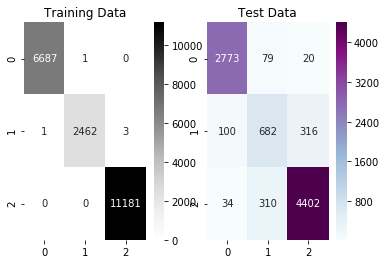

In [125]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');

In [126]:
print(classification_report(y_train, ytrain_predict))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      6688
          1       1.00      1.00      1.00      2466
          2       1.00      1.00      1.00     11181

avg / total       1.00      1.00      1.00     20335



In [127]:
print(classification_report(y_test, ytest_predict))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      2872
          1       0.64      0.62      0.63      1098
          2       0.93      0.93      0.93      4746

avg / total       0.90      0.90      0.90      8716



In [128]:
param_grid = {
    'max_depth': [7, 10],
    'max_features': [4, 6],
    'min_samples_leaf': [50, 100, 300],
    'min_samples_split': [100, 150],
    'n_estimators': [301, 501]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [129]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 10], 'max_features': [4, 6], 'min_samples_leaf': [50, 100, 300], 'min_samples_split': [100, 150], 'n_estimators': [301, 501]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [130]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 50,
 'min_samples_split': 150,
 'n_estimators': 301}

In [131]:
best_grid = grid_search.best_estimator_

In [132]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

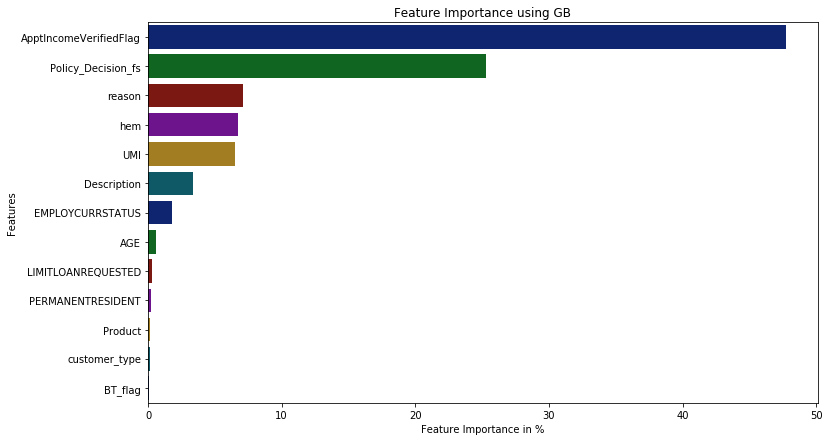

In [133]:
x=pd.DataFrame(best_grid.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using GB')
plt.show()

In [134]:
confusion_matrix(y_train,ytrain_predict)

array([[ 6425,   191,    72],
       [  234,  1565,   667],
       [  106,   611, 10464]], dtype=int64)

In [135]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');

In [136]:
print(classification_report(y_train, ytrain_predict))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96      6688
          1       0.66      0.63      0.65      2466
          2       0.93      0.94      0.93     11181

avg / total       0.91      0.91      0.91     20335



In [137]:
print(classification_report(y_test, ytest_predict))

             precision    recall  f1-score   support

          0       0.96      0.96      0.96      2872
          1       0.65      0.63      0.64      1098
          2       0.93      0.93      0.93      4746

avg / total       0.90      0.90      0.90      8716



In [138]:
print("Accuracy:",metrics.accuracy_score(y_test, ytest_predict))
print("Accuracy:",metrics.accuracy_score(y_train, ytrain_predict))

Accuracy: 0.903396053235
Accuracy: 0.907499385296


In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
a = cross_val_score(best_grid, X_train, y_train, cv=2, scoring="accuracy")
a.mean()

0.90149978734365055

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return(vif)

In [142]:
DF= calc_vif(X_train).sort_values(by='VIF', ascending = True)
DF

variables        VIF
6       LIMITLOANREQUESTED   1.034343
0                      AGE   1.158612
11                  reason   1.165667
5         EMPLOYCURRSTATUS   1.169578
4              Description   1.280357
2                  BT_flag   1.346708
3            customer_type   1.348621
9                  Product   1.388800
7        PERMANENTRESIDENT   1.500539
1   ApptIncomeVerifiedFlag   1.732707
8       Policy_Decision_fs   1.889976
10                     hem  10.128455
12                     UMI  10.625710

In [143]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [144]:
y_train_predict = KNN_model.predict(X_train)
y_test_predict = KNN_model.predict(X_test)

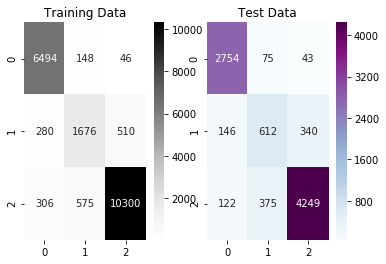

In [145]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');

In [146]:
print(classification_report(y_train, y_train_predict))

             precision    recall  f1-score   support

          0       0.92      0.97      0.94      6688
          1       0.70      0.68      0.69      2466
          2       0.95      0.92      0.93     11181

avg / total       0.91      0.91      0.91     20335



In [147]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93      2872
          1       0.58      0.56      0.57      1098
          2       0.92      0.90      0.91      4746

avg / total       0.87      0.87      0.87      8716



In [148]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_predict))

Accuracy: 0.873680587425
Accuracy: 0.908286206049


In [149]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100, random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=1)

In [150]:
y_train_predict = ADB_model.predict(X_train)
y_test_predict = ADB_model.predict(X_test)

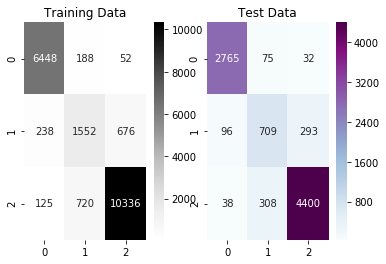

In [151]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');

In [152]:
print(classification_report(y_train, y_train_predict))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96      6688
          1       0.63      0.63      0.63      2466
          2       0.93      0.92      0.93     11181

avg / total       0.90      0.90      0.90     20335



In [153]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.95      0.96      0.96      2872
          1       0.65      0.65      0.65      1098
          2       0.93      0.93      0.93      4746

avg / total       0.90      0.90      0.90      8716



In [154]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_predict))

Accuracy: 0.903396053235
Accuracy: 0.901696582247


In [155]:
from sklearn.ensemble import GradientBoostingClassifier
gbc1 = GradientBoostingClassifier(random_state=1)
gbc1=gbc1.fit(X_train,y_train)

In [156]:
y_train_predict = gbc1.predict(X_train)
y_test_predict = gbc1.predict(X_test)

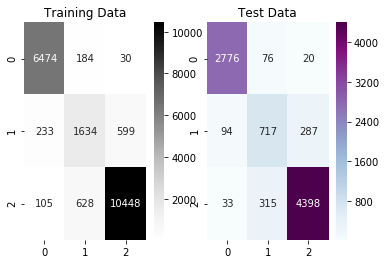

In [157]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='BuPu', ax=a[0][1]);
a[0][1].set_title('Test Data');


In [158]:
print(classification_report(y_train, y_train_predict))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      6688
          1       0.67      0.66      0.67      2466
          2       0.94      0.93      0.94     11181

avg / total       0.91      0.91      0.91     20335



In [159]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      2872
          1       0.65      0.65      0.65      1098
          2       0.93      0.93      0.93      4746

avg / total       0.91      0.91      0.91      8716



In [160]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Accuracy:",metrics.accuracy_score(y_train, y_train_predict))

Accuracy: 0.905346489215
Accuracy: 0.912515367593


In [161]:
x=pd.DataFrame(gbc1.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using GB')
plt.show()

In [162]:
X_train = X_train[["AGE","ApptIncomeVerifiedFlag","Description","EMPLOYCURRSTATUS", "LIMITLOANREQUESTED", "Policy_Decision_fs","Product","PERMANENTRESIDENT", "reason", "UMI"]] 
X_test = X_test[["AGE","ApptIncomeVerifiedFlag","Description","EMPLOYCURRSTATUS", "LIMITLOANREQUESTED", "Policy_Decision_fs","Product","PERMANENTRESIDENT", "reason", "UMI"]]

In [163]:
print(classification_report(y_train, y_train_predict))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96      6688
          1       0.67      0.66      0.67      2466
          2       0.94      0.93      0.94     11181

avg / total       0.91      0.91      0.91     20335



In [164]:
print(classification_report(y_test, y_test_predict))

             precision    recall  f1-score   support

          0       0.96      0.97      0.96      2872
          1       0.65      0.65      0.65      1098
          2       0.93      0.93      0.93      4746

avg / total       0.91      0.91      0.91      8716



In [165]:
a = cross_val_score(gbc2, X_train, y_train, cv=3, scoring="accuracy")
a.mean()

NameError: name 'gbc2' is not defined

In [ ]:
a= gbc2.predict(X_train)
gbc2.predict(X_test)

In [ ]:
acc = accuracy_score(y_train,a)
print(acc)

In [ ]:
import pickle

In [ ]:
with open ('model_pickle','wb') as file:
    pickle.dump(gbc2,file)
    
with open('model_pickle','rb') as file:
    loaded_model = pickle.load(file)

loaded_model.predict(X_test)

In [ ]:
X.head()

In [169]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=1, subsample=1.0, verbose=0,
              warm_start=False)

In [170]:
y_predict = gbc.predict(X)

In [171]:
print("Accuracy:",metrics.accuracy_score(y, y_predict))

Accuracy: 0.910949709132


In [172]:
y_predict = gbc.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_predict))

Accuracy: 0.910949709132


In [173]:
pred_gbc=gbc.predict(X.values)
pred_prob_gbc= gbc.predict_proba(X.values)

pred_gbc

array([2, 2, 2, ..., 2, 2, 2], dtype=int8)

In [174]:
#probabilities

pred_prob_gbc

array([[  2.90794021e-04,   1.73735156e-03,   9.97971854e-01],
       [  9.14985316e-04,   7.46368095e-03,   9.91621334e-01],
       [  5.28440027e-04,   1.56190498e-03,   9.97909655e-01],
       ..., 
       [  4.26274615e-03,   1.42234401e-01,   8.53502853e-01],
       [  2.38893161e-02,   3.80216313e-01,   5.95894371e-01],
       [  3.12459018e-03,   4.84752039e-03,   9.92027889e-01]])

In [175]:
#function to select second column for probabilities
def column(matrix,i):
    return[row[i] for row in matrix]
column(pred_prob_gbc,0)

[0.0002907940210288039,
 0.00091498531602121212,
 0.00052844002660448026,
 0.0058474461891128053,
 0.0010951799474478146,
 0.0027181800020473091,
 0.0025080819945192357,
 0.0033764843595342989,
 0.004036643077933404,
 0.00039550137024670231,
 0.00027139225094044883,
 0.0011143771160650204,
 0.0039010242969732462,
 0.0030535596235814868,
 0.003188420924411327,
 0.98673802951417888,
 0.96993223878557766,
 0.80412368165311776,
 0.96130632242242287,
 0.0026011943865042355,
 0.96325467908831242,
 0.97865842771419753,
 0.98539703396656531,
 0.0017054722996254395,
 0.98462035673708559,
 0.97459305252923867,
 0.98286297612457829,
 0.9131712986725109,
 0.00057996800090932463,
 0.0012919500401709113,
 0.00091997040804847976,
 0.96062099460445627,
 0.96160945044855373,
 0.95419426311510069,
 0.98634320176582069,
 0.96791743300052913,
 0.84724816377644951,
 0.15873313285910925,
 0.020571134120128221,
 0.92250384148466436,
 0.0010347725163179164,
 0.97568503163543563,
 0.0017230912354866002,
 0.979

In [176]:
#Joining the raw data with the predictiona

output = credit_df1.copy()
output['Predictions- Approve or not']= pred_gbc
output['Predictions - Probability of approved']=column(pred_prob_gbc,0)
output['Predictions - Probability of cancel']=column(pred_prob_gbc,1)
output['Predictions - Probability of decline']=column(pred_prob_gbc,2)
output['Predictions- Approved or not des'] = 'Empty'
output['Predictions- Approved or not des'][output['Predictions- Approve or not']== 0] ="Approve"
output['Predictions- Approved or not des'][output['Predictions- Approve or not']== 1] ="Cancel"
output['Predictions- Approved or not des'][output['Predictions- Approve or not']== 2] ="Decline"
output.head(20)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


AGE     App Number ApptIncomeVerifiedFlag BT_flag        customer_type  \
0    20  2032883289503                      N       N                  NTB   
1    29  2032913297845                      N       N                  NTB   
2    52  2020287290073                      N       N  Existing-NonLending   
3    55  2032823270310                      N       N     Existing-Lending   
4    57  2020290430042                      N       N     Existing-Lending   
5    35  2020286430015                      N       N     Existing-Lending   
6    45  2020303430051                      N       N     Existing-Lending   
7    62  2020292430011                      N       N     Existing-Lending   
8    86  2020287430044                      N       N     Existing-Lending   
9    19  2033073349390                      N       N                  NTB   
10   19  2033173383840                      N       N                  NTB   
11   25  2033253408368                      N       N  Existing-NonLending   
12   65  2033303426371                      N       N     Existing-Lending   
13   39  2020328430070                      N       N     Existing-Lending   
14   54  2020321430017                      N       N     Existing-Lending   
15   27  2033223396868                      Y       N                  NTB   
16   38  2032993321722                      Y       N  Existing-NonLending   
17   50  2033003324977                      Y       N                  NTB   
18   33  2032903296522                      Y       N  Existing-NonLending   
19   35  2032993320892                      N       Y                  NTB   

                            Description EMPLOYCURRSTATUS Final_Decision  \
0   Score Decline (Permanent Residents)  e. Not Employed        Decline   
1                  Low Gross Annual Inc  e. Not Employed        Decline   
2            Paid Adverse Bureau - Veda  e. Not Employed        Decline   
3                  Low Gross Annual Inc     a. Full time        Decline   
4              Insufficient UMI Decline  e. Not Employed        Decline   
5              Insufficient UMI Decline  e. Not Employed        Decline   
6              Insufficient UMI Decline  e. Not Employed        Decline   
7              Insufficient UMI Decline  e. Not Employed        Decline   
8              Insufficient UMI Decline     f. Pensioner        Decline   
9                  Low Gross Annual Inc  e. Not Employed        Decline   
10  Score Decline (Permanent Residents)  e. Not Employed        Decline   
11     Adverse Account Conduct – Bureau  e. Not Employed        Decline   
12                 Low Gross Annual Inc     f. Pensioner        Decline   
13             Insufficient UMI Decline  e. Not Employed        Decline   
14             Insufficient UMI Decline  e. Not Employed        Decline   
15        Income Verifn Reqd - New Cust     a. Full time        Approve   
16                Undisclosed CC Limits     a. Full time        Approve   
17        Income Verifn Reqd - New Cust     a. Full time        Approve   
18                Undisclosed CC Limits     a. Full time        Approve   
19     Unpaid Def Paid Judgmnt Summ DnB     a. Full time        Decline   

    LIMITLOANREQUESTED PERMANENTRESIDENT                ...                 \
0                15000                 Y                ...                  
1                 1000                 N                ...                  
2                 1000                 Y                ...                  
3                10000                 Y                ...                  
4                 5000               CLI                ...                  
5                 5000               CLI                ...                  
6                 6000               CLI                ...                  
7                10000               CLI                ...                  
8                10000               CLI                ...                  
9        

In [ ]:
output.to_excel('Prediction Output.xlsx', index=False)
output.to_excel('Prediction Output.xlsx', index=False)

os.getcwd()

In [ ]:
clf = LogisticRegression(random_state=0).fit(X, y)

print(clf.coef_)

In [ ]:
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, clf.coef_[0][idx]))